In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

In [3]:
import glob
weekly_dump_directory = '../data/gabbar-0.4/weekly-dump/*.csv'
dump_files = glob.glob(weekly_dump_directory)

In [4]:
changesets = pd.read_csv('../data/exploratory-data-analysis/changesets.csv')
print(changesets.shape)
changesets.sample(3)

(39009, 19)


,ID,user,editor,Powerfull Editor,comment,source,imagery used,date,reasons,reasons__name,create,modify,delete,bbox,is suspect,harmful,checked,check user,check date
17362,43789617,darren chan,MAPS.ME ios 6.4.4,False,Not reported,Not reported,Not reported,2016-11-19T04:57:02+00:00,NaN,NaN,1.0,1.0,0.0,"SRID=4326;POLYGON ((121.5177563 25.0610875, 12...",False,False,True,22,2016-11-21T05:22:16.394872+00:00
1226,45873616,Steven Saltos,MAPS.ME android 7.1.3-Google,False,Created a cafe,Not reported,Not reported,2017-02-07T04:06:23+00:00,NaN,NaN,1.0,0.0,0.0,"SRID=4326;POLYGON ((-79.460292 -0.2780972, -79...",False,False,True,11,2017-02-07T06:51:39.867693+00:00
25265,40710580,Kestas112,JOSM/1.5 (9060 ru),True,Not reported,Not reported,Not reported,2016-07-13T12:18:28+00:00,2.0,possible import,22915.0,0.0,0.0,"SRID=4326;POLYGON ((22.4552026 55.6196097, 23....",True,True,True,18,2016-07-25T19:11:00.919707+00:00


In [5]:
features = pd.read_csv('../data/exploratory-data-analysis/features.csv')
print(features.shape)
features.sample(3)

(39009, 9)


,ID,user,harmful,create,modify,delete,bbox_area,user_changesets,user_features
29275,39280626,Russell720,False,235.0,105.0,143.0,296.3840,4650.0,420328.0
19880,43357277,Supaplex,False,2.0,4.0,0.0,9.1224,11266.0,1198127.0
20377,43210946,Petr1868,False,11500.0,9761.0,5471.0,179.3791,14200.0,27769569.0


In [6]:
features['user'].value_counts()[:3]

chinakz                     2912
pnorman redaction revert     687
woodpeck_repair              342
Name: user, dtype: int64

In [7]:
# Filtering out changesets from user "chinakz"
features = features[features['user'] != 'chinakz']
features.shape

(36097, 9)

In [8]:
columns = ['create', 'modify', 'delete', 'bbox_area', 'user_changesets', 'user_features', 'harmful']
numerical_features = features[columns].dropna()
numerical_features.shape

(35347, 7)

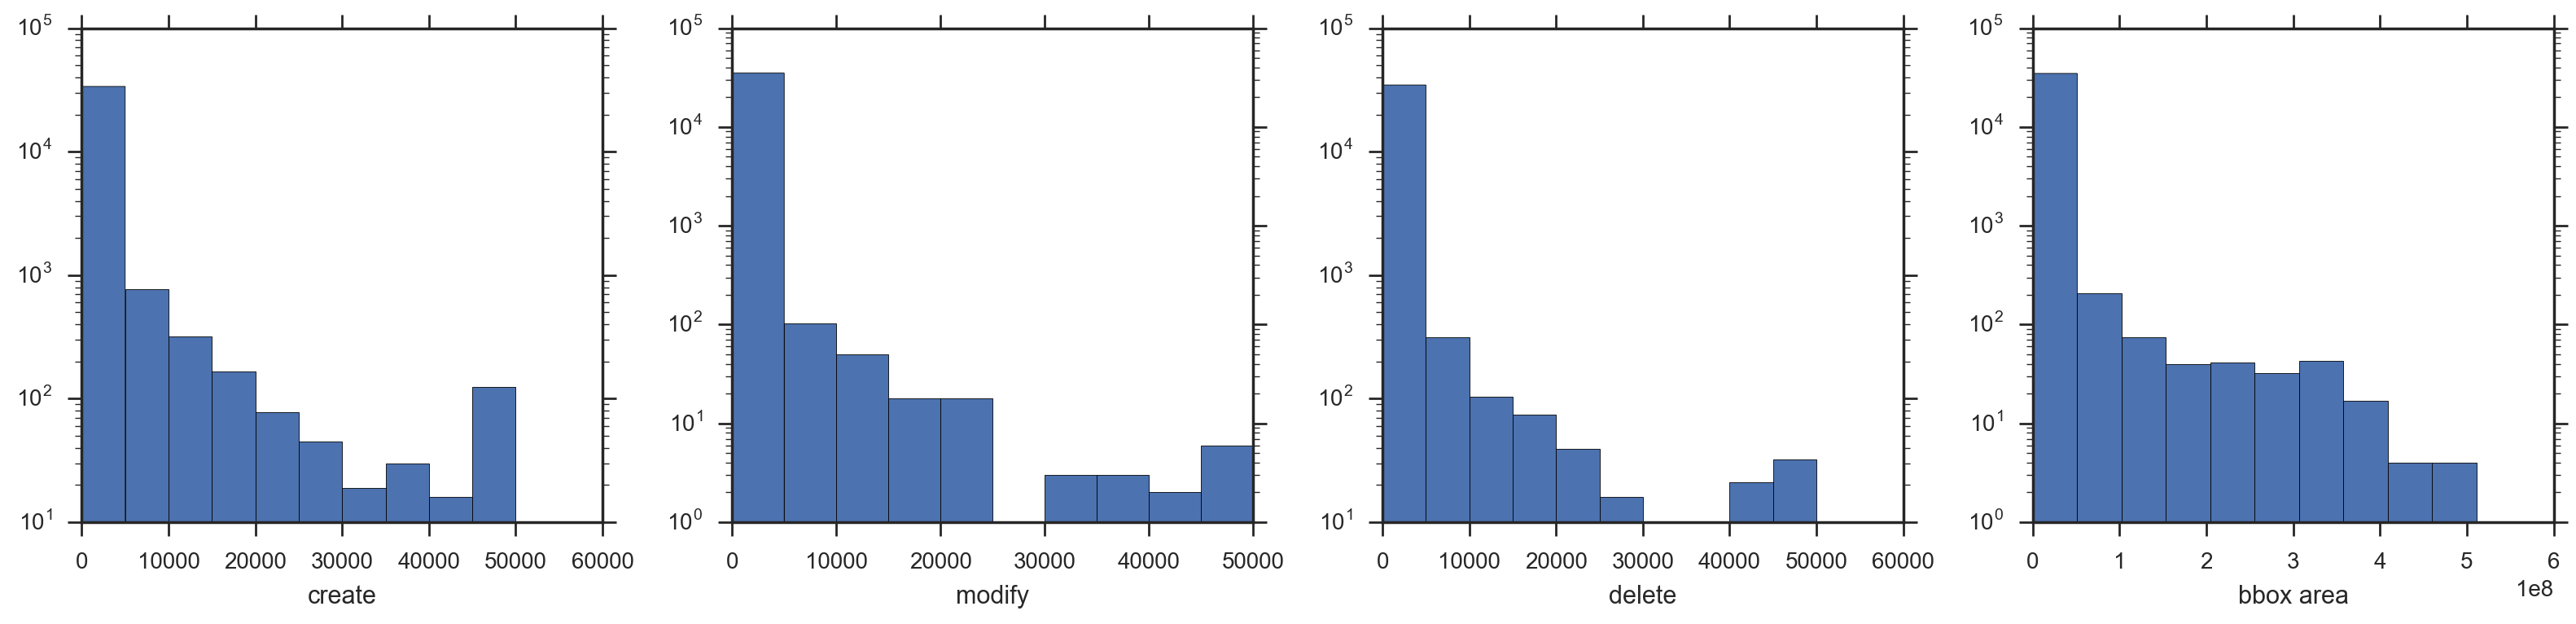

In [9]:
(fig, ax) = plt.subplots(1, 4, figsize=(16, 4))

ax[0].hist(numerical_features['create'])
ax[0].set_yscale('log')
ax[0].set_xlabel('create')

ax[1].hist(numerical_features['modify'])
ax[1].set_yscale('log')
ax[1].set_xlabel('modify')

ax[2].hist(numerical_features['delete'])
ax[2].set_yscale('log')
ax[2].set_xlabel('delete')

ax[3].hist(numerical_features['bbox_area'])
ax[3].set_yscale('log')
ax[3].set_xlabel('bbox area')

plt.tight_layout()

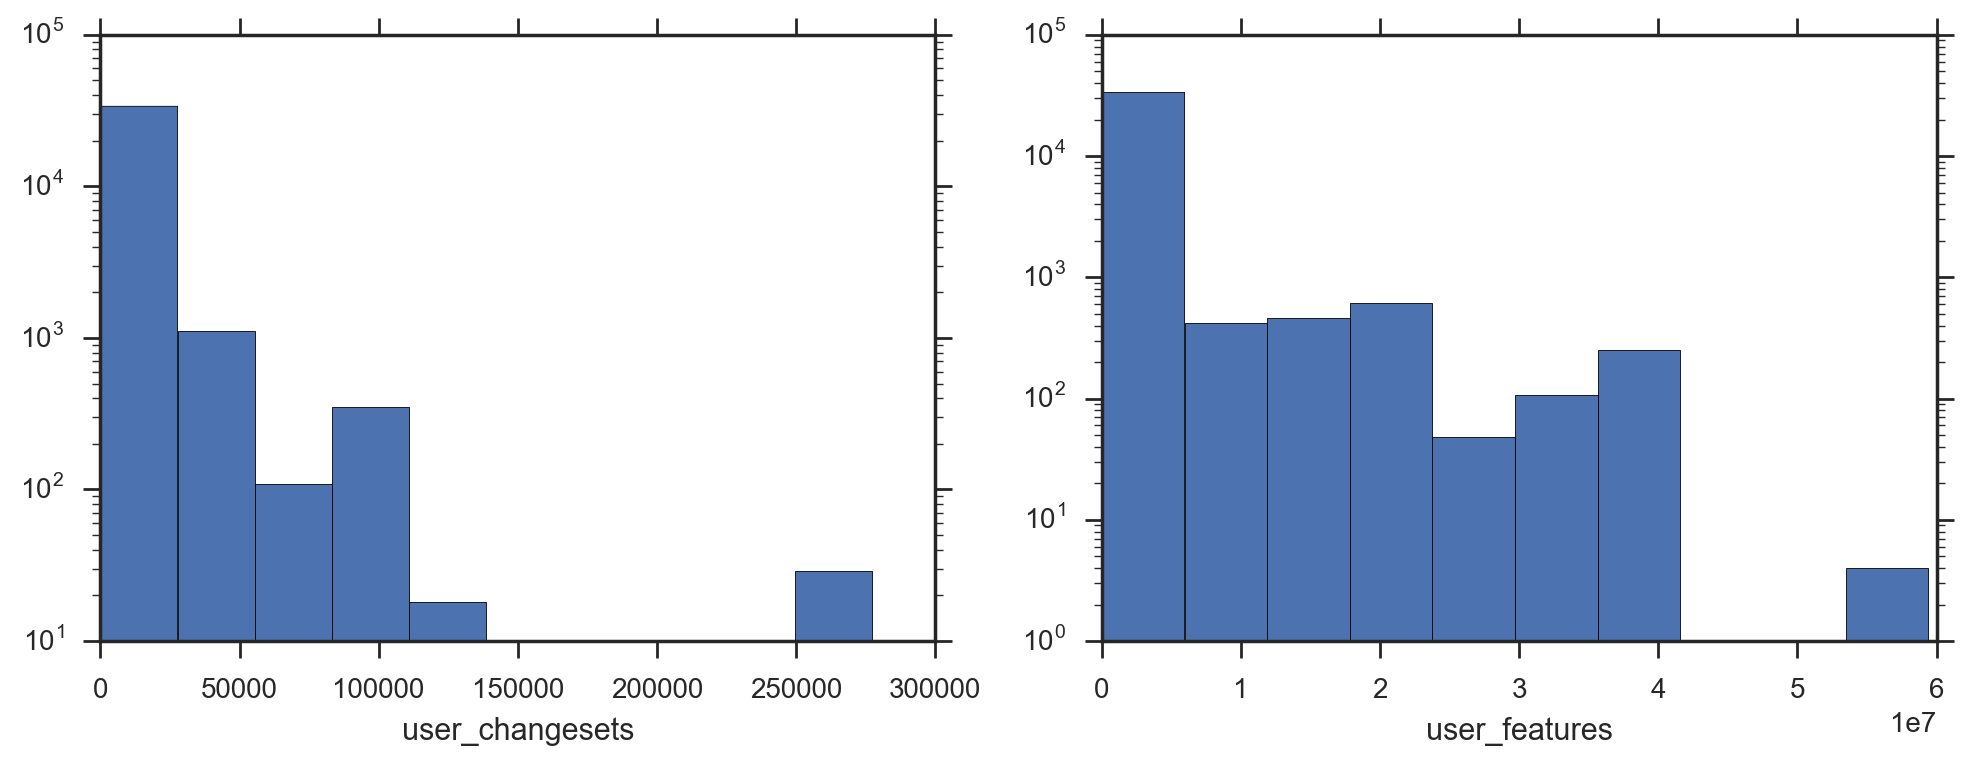

In [10]:
(fig, ax) = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(numerical_features['user_changesets'])
ax[0].set_yscale('log')
ax[0].set_xlabel('user_changesets')

ax[1].hist(numerical_features['user_features'])
ax[1].set_yscale('log')
ax[1].set_xlabel('user_features')

plt.tight_layout()

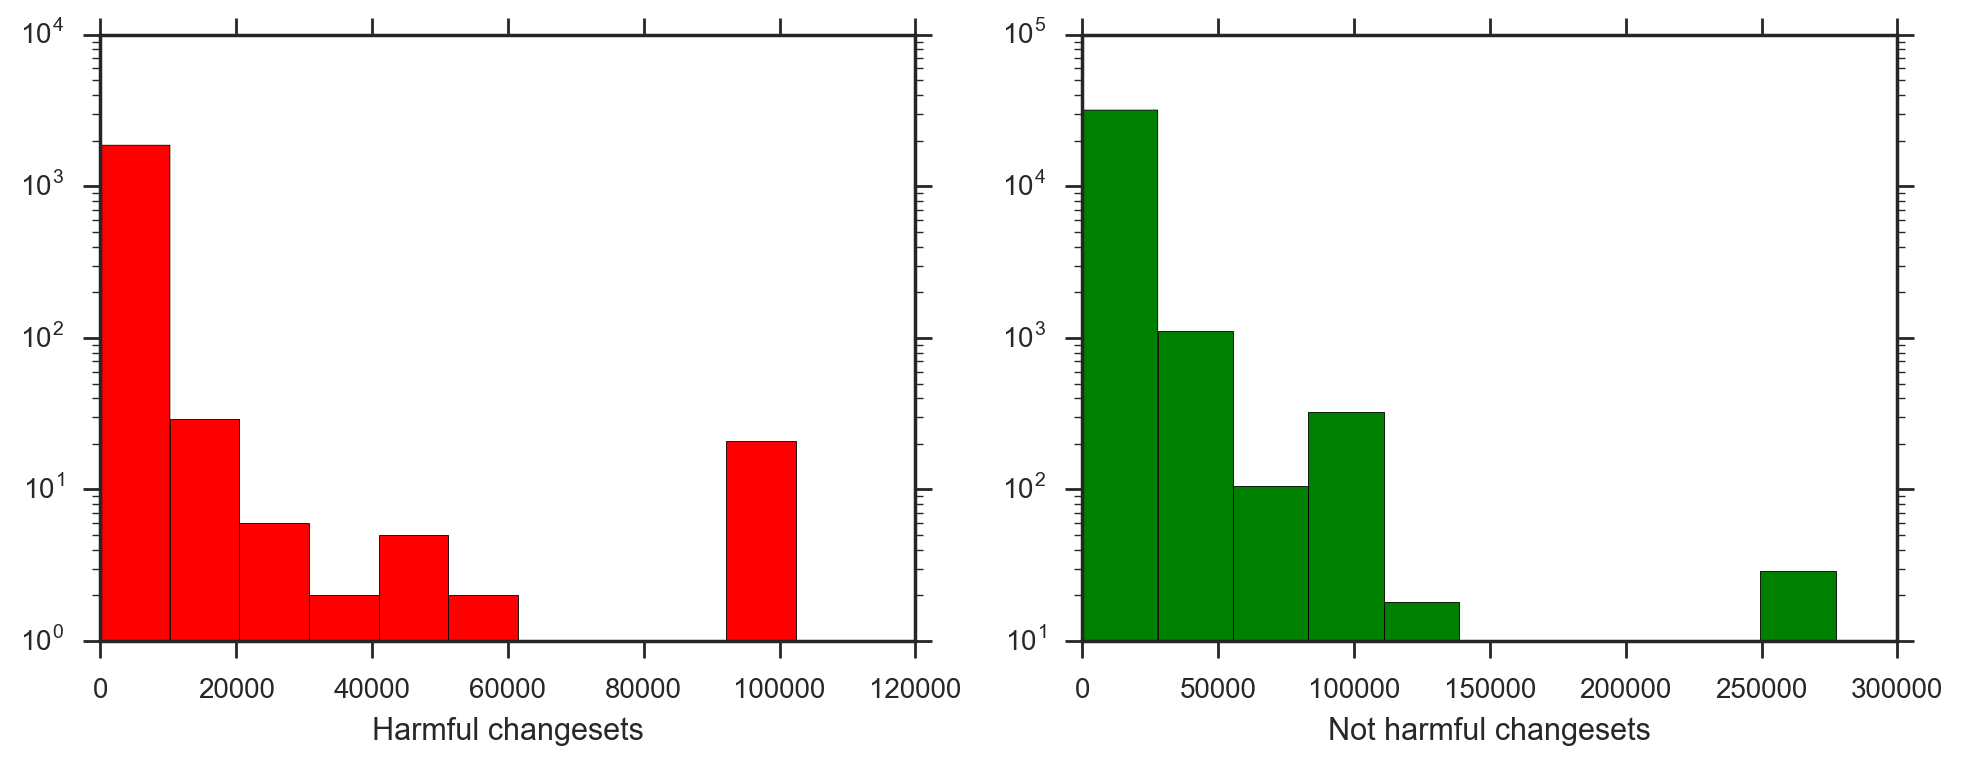

In [11]:
(fig, ax) = plt.subplots(1, 2, figsize=(10, 4))

ax[0].hist(numerical_features[numerical_features['harmful'] == True]['user_changesets'], color='r')
ax[0].set_yscale('log')
ax[0].set_xlabel('Harmful changesets')

ax[1].hist(numerical_features[numerical_features['harmful'] == False]['user_changesets'], color='g')
ax[1].set_yscale('log')
ax[1].set_xlabel('Not harmful changesets')

plt.tight_layout()

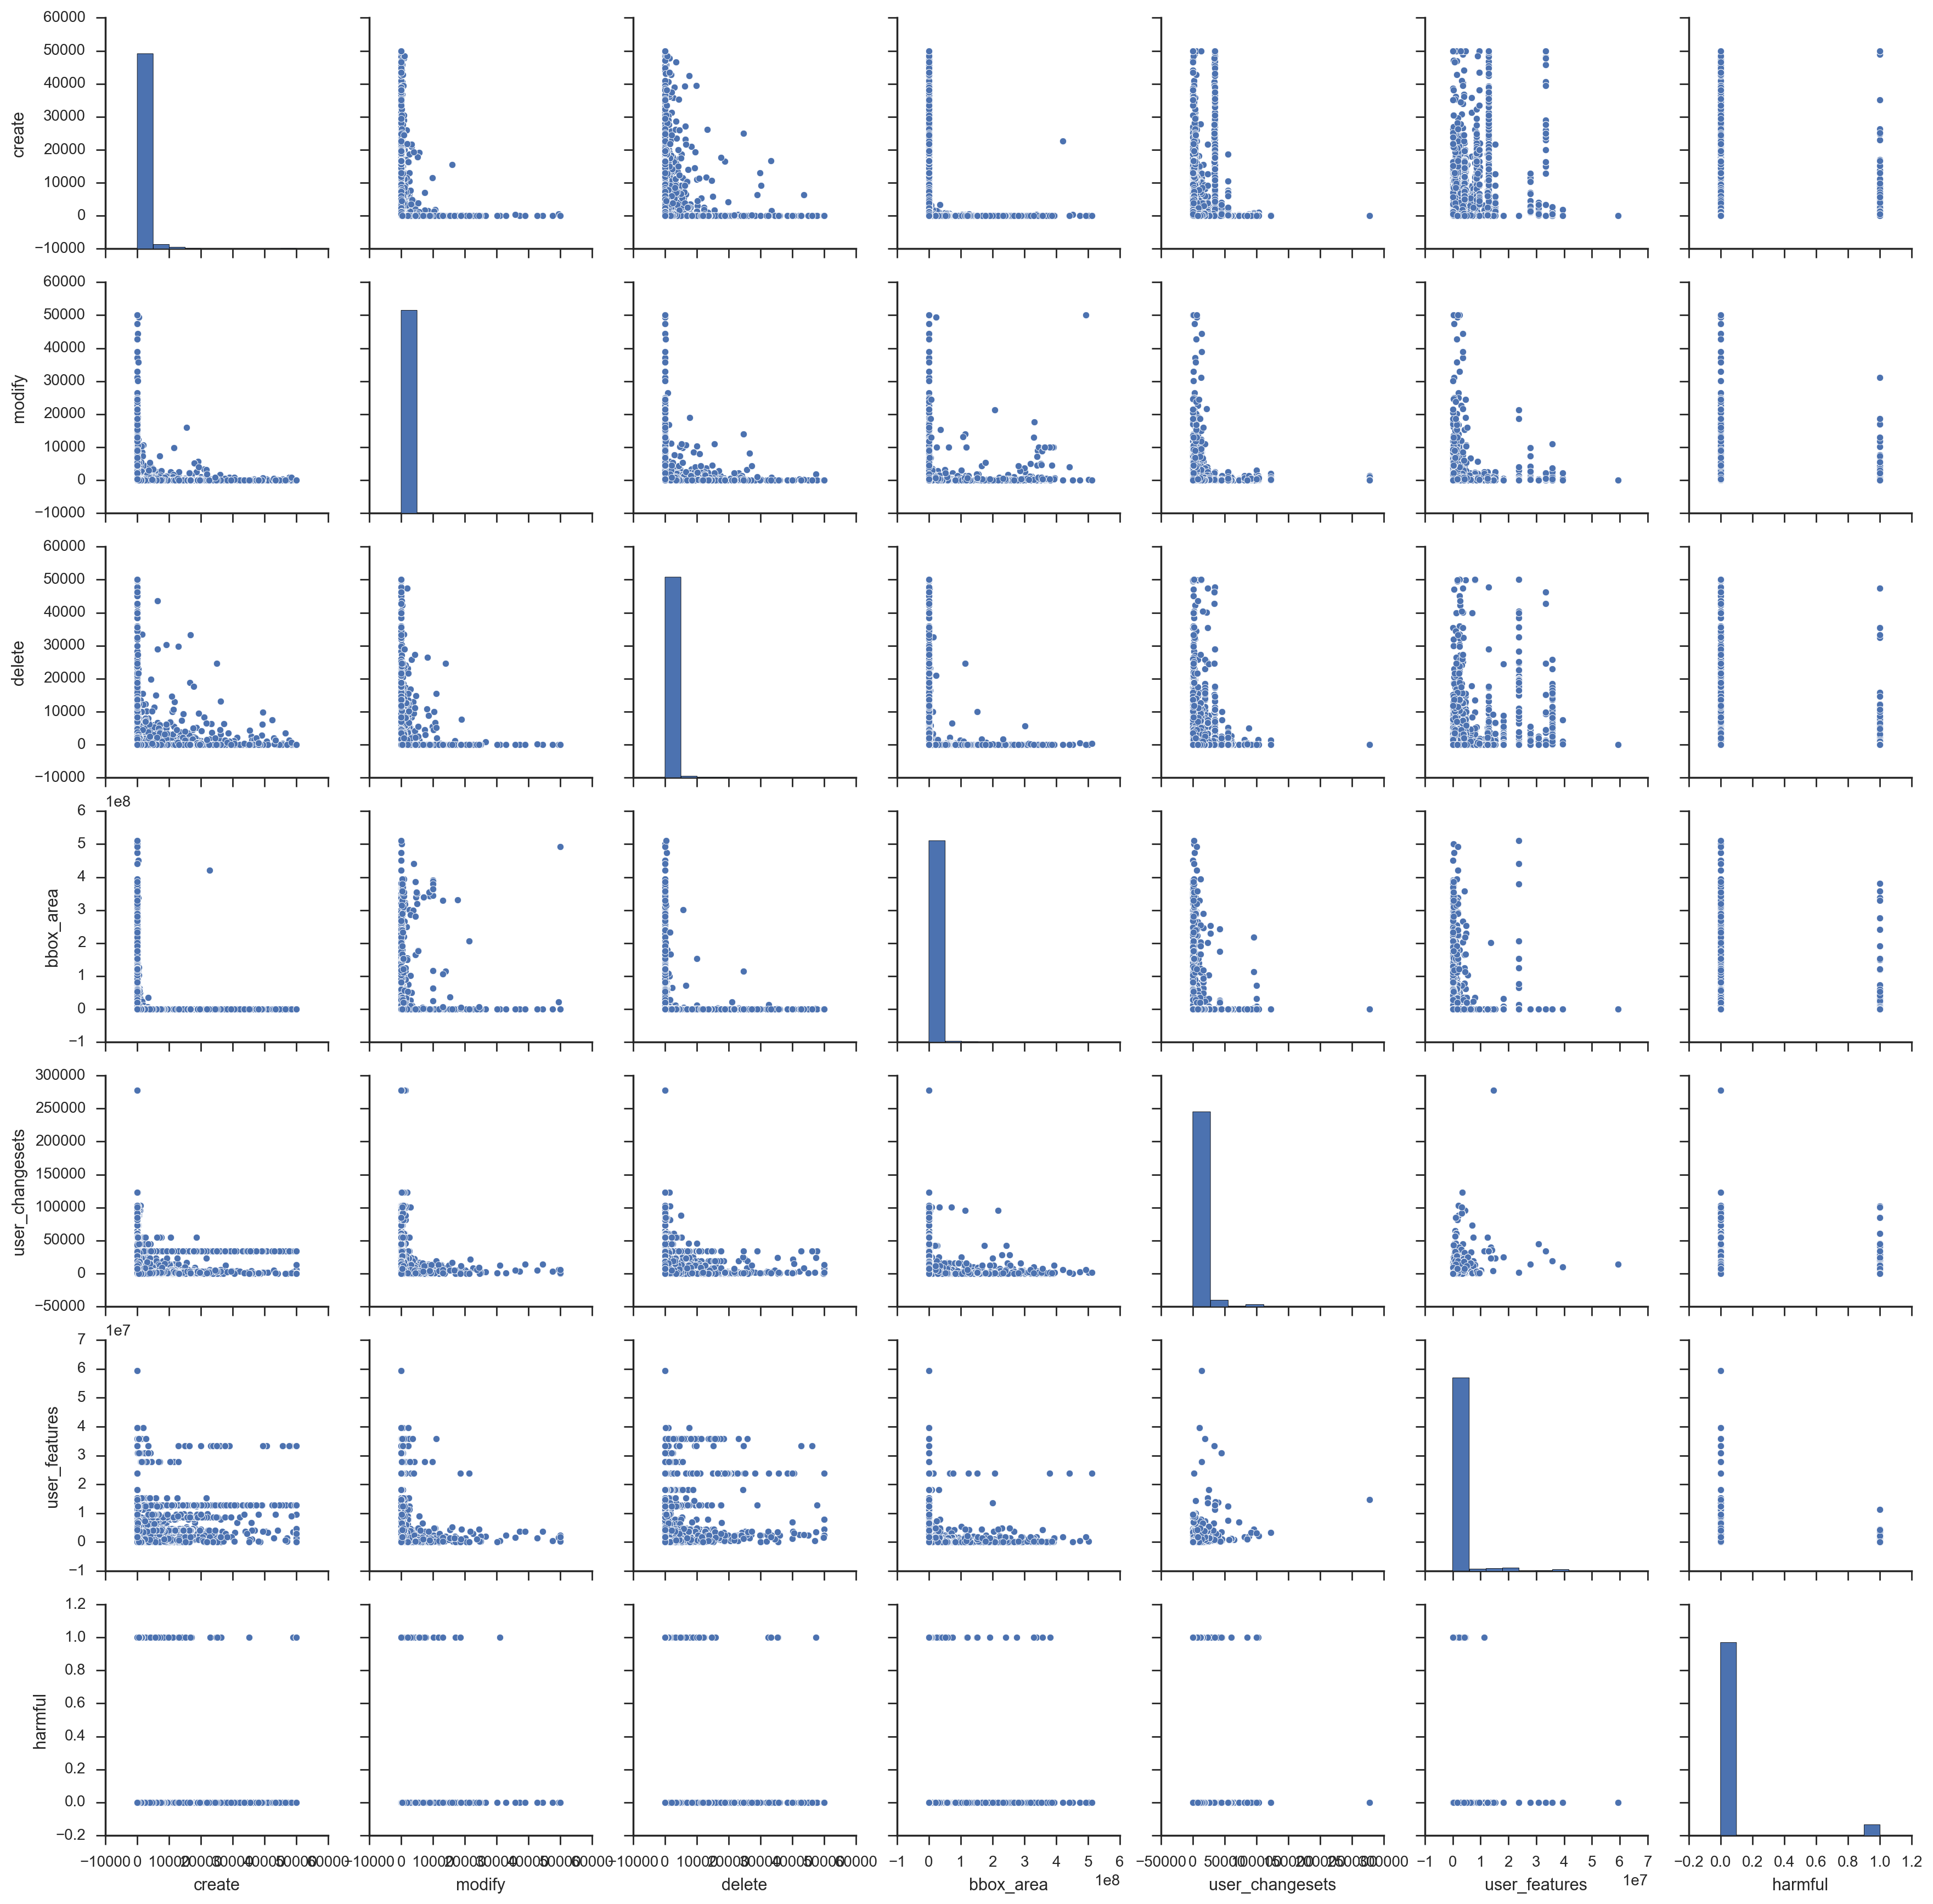

In [12]:
sns.pairplot(numerical_features)

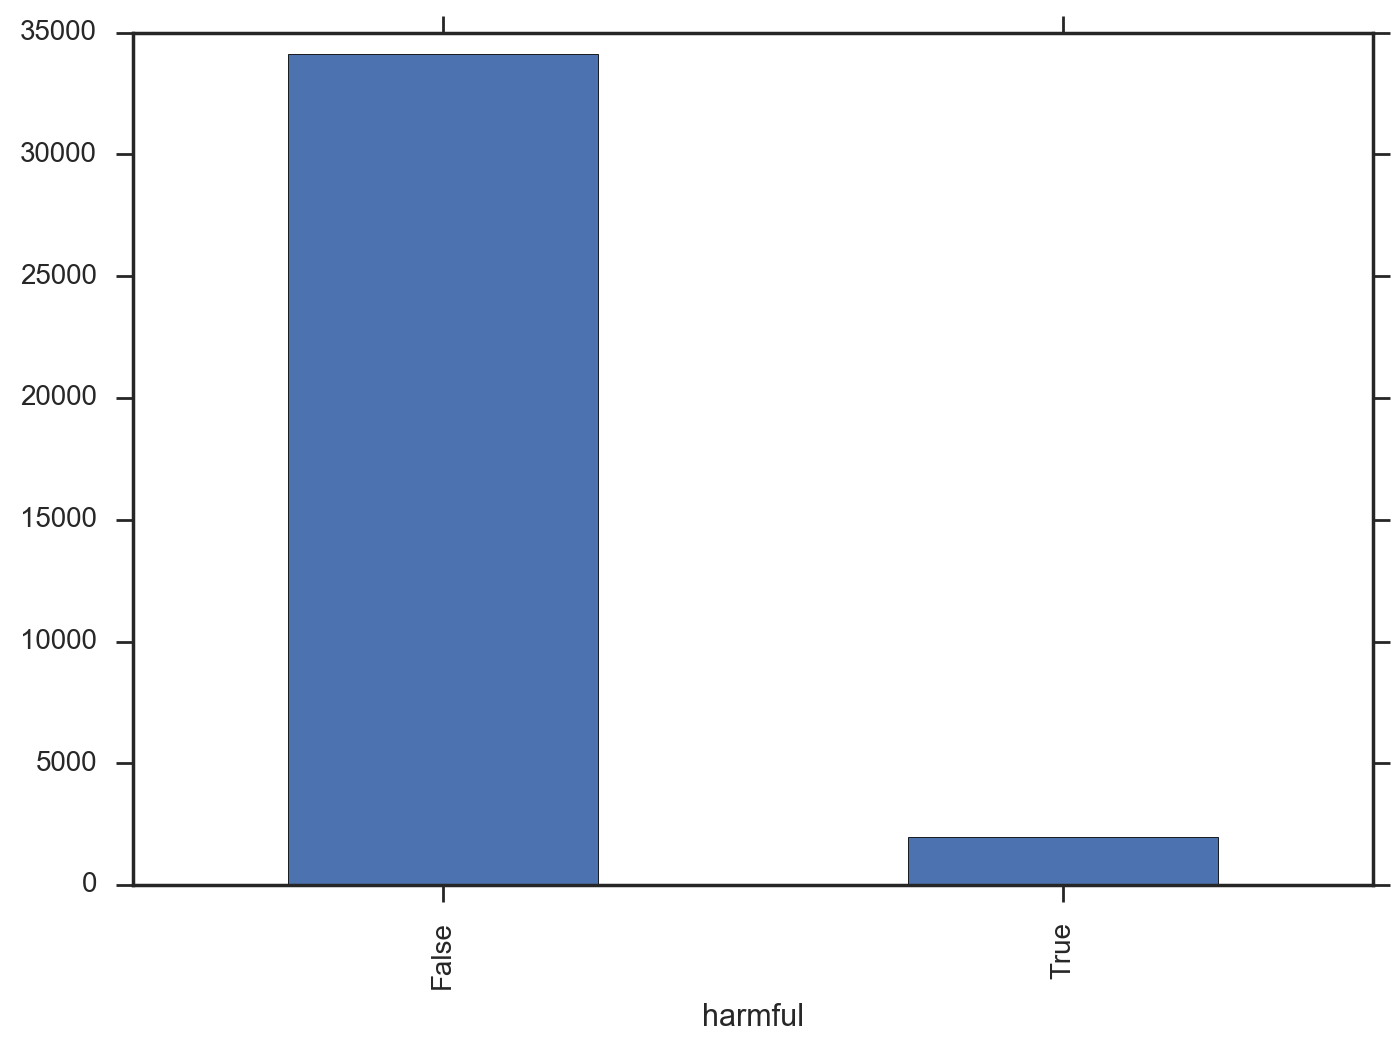

In [13]:
features.groupby('harmful')['ID'].count().plot.bar()

In [14]:
numerical_features.describe()

,create,modify,delete,bbox_area,user_changesets,user_features
count,35347.000000,35347.000000,35347.000000,3.534700e+04,35347.000000,3.534700e+04
mean,893.130987,167.810479,406.342971,2.388298e+06,5865.765666,1.662490e+06
std,4096.758967,1268.094232,2547.154009,2.211351e+07,15081.393239,4.847374e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,5.075000e-02,94.000000,4.873000e+03
50%,4.000000,1.000000,0.000000,1.174900e+00,1272.000000,1.753780e+05
75%,210.000000,19.000000,26.000000,5.106520e+01,5049.000000,1.082325e+06
max,50001.000000,50000.000000,50001.000000,5.112079e+08,277340.000000,5.940455e+07


In [15]:
numerical_features[numerical_features['harmful'] == False].describe()

,create,modify,delete,bbox_area,user_changesets,user_features
count,33414.000000,33414.000000,33414.000000,3.341400e+04,33414.000000,3.341400e+04
mean,897.188185,170.000958,411.420363,2.410824e+06,6069.780391,1.744047e+06
std,4017.039436,1274.574333,2565.530517,2.215394e+07,15250.150445,4.970231e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,5.152500e-02,112.000000,6.631000e+03
50%,4.000000,1.000000,0.000000,1.187650e+00,1385.000000,2.007780e+05
75%,218.000000,20.000000,27.000000,5.234010e+01,5350.000000,1.146658e+06
max,50001.000000,50000.000000,50001.000000,5.112079e+08,277340.000000,5.940455e+07


In [16]:
numerical_features[numerical_features['harmful'] == True].describe()

,create,modify,delete,bbox_area,user_changesets,user_features
count,1933.000000,1933.000000,1933.000000,1.933000e+03,1933.000000,1.933000e+03
mean,822.997931,129.945680,318.574754,1.998918e+06,2339.150026,2.527040e+05
std,5288.997482,1149.965431,2204.160201,2.140451e+07,11219.536181,7.387584e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,3.880000e-02,19.000000,3.670000e+02
50%,5.000000,1.000000,0.000000,1.027200e+00,94.000000,4.628000e+03
75%,61.000000,9.000000,20.000000,3.217940e+01,780.000000,8.168200e+04
max,50001.000000,31061.000000,47417.000000,3.805021e+08,102423.000000,1.136299e+07


In [89]:
df = numerical_features[numerical_features['harmful'] == False].describe() / numerical_features[numerical_features['harmful'] == True].describe()
df.fillna(0)

,create,modify,delete,bbox_area,user_changesets,user_features
count,17.286084,17.286084,17.286084,17.286084,17.286084,17.286084
mean,1.090146,1.308246,1.291441,1.206065,2.594866,6.901539
std,0.759509,1.108359,1.163949,1.035013,1.359250,6.727816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.327964,5.894737,18.068120
50%,0.800000,1.000000,0.000000,1.156201,14.734043,43.383319
75%,3.573770,2.222222,1.350000,1.626510,6.858974,14.038074
max,1.000000,1.609736,1.054495,1.343509,2.707790,5.227897


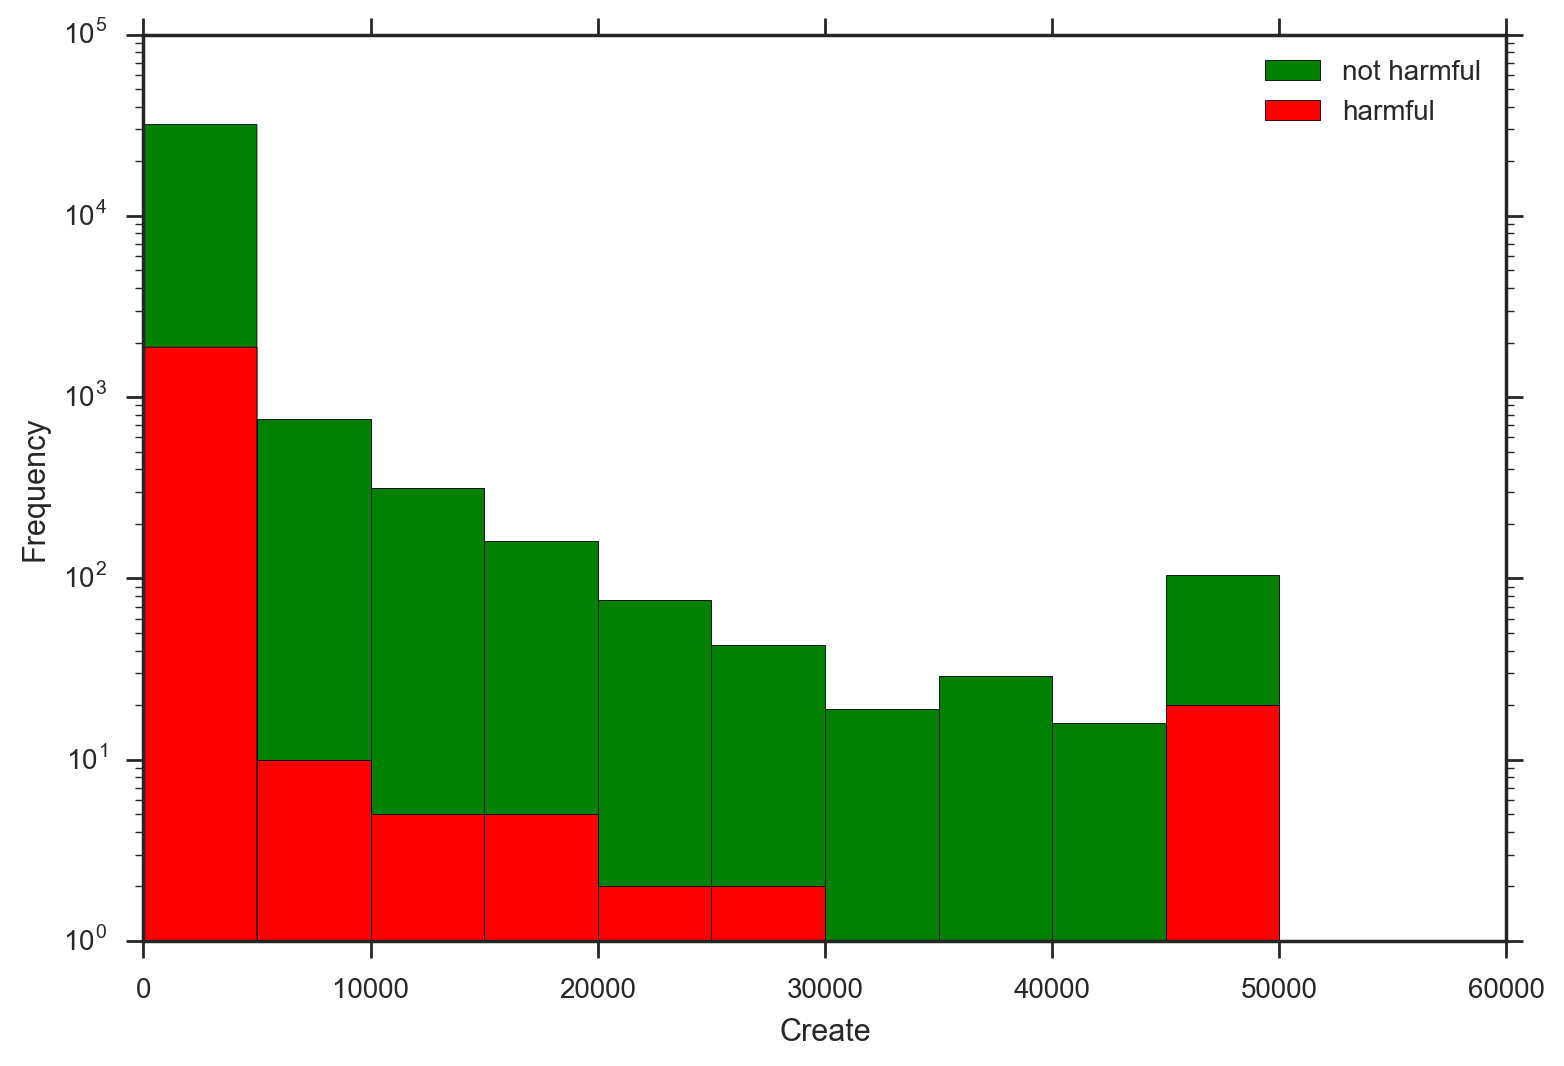

In [87]:
ax = numerical_features[numerical_features['harmful'] == False]['create'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['create'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('Create')
plt.tight_layout()

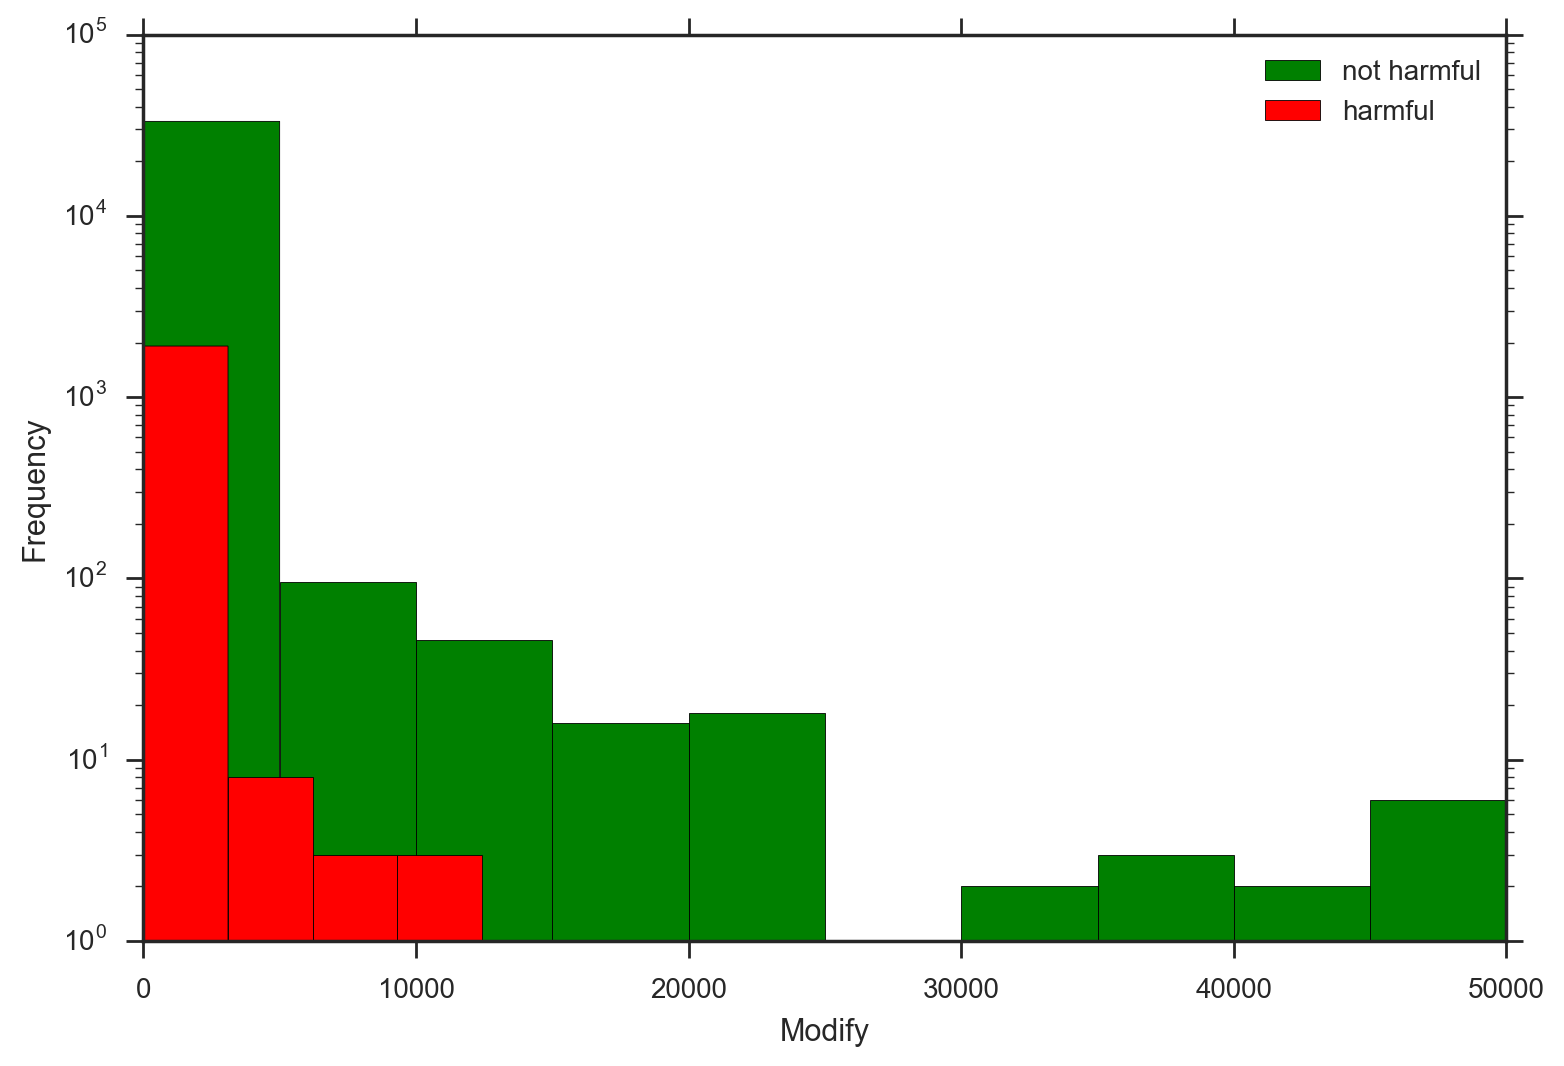

In [86]:
ax = numerical_features[numerical_features['harmful'] == False]['modify'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['modify'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('Modify')
plt.tight_layout()

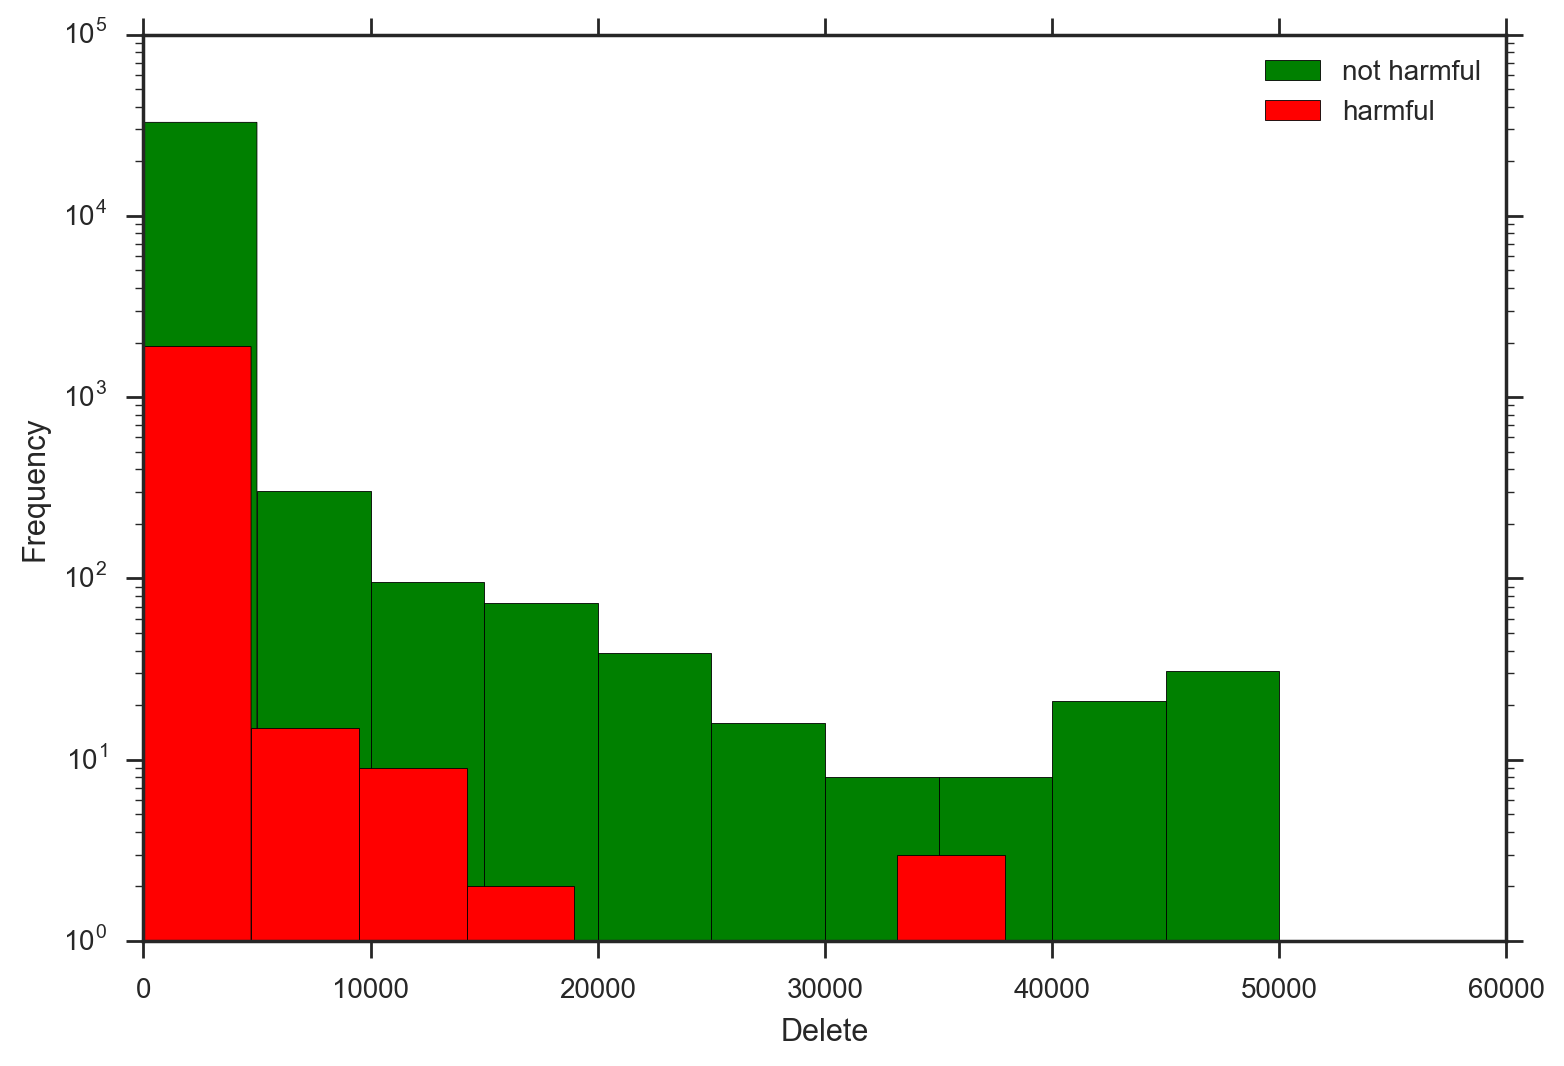

In [85]:
ax = numerical_features[numerical_features['harmful'] == False]['delete'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['delete'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('Delete')
plt.tight_layout()

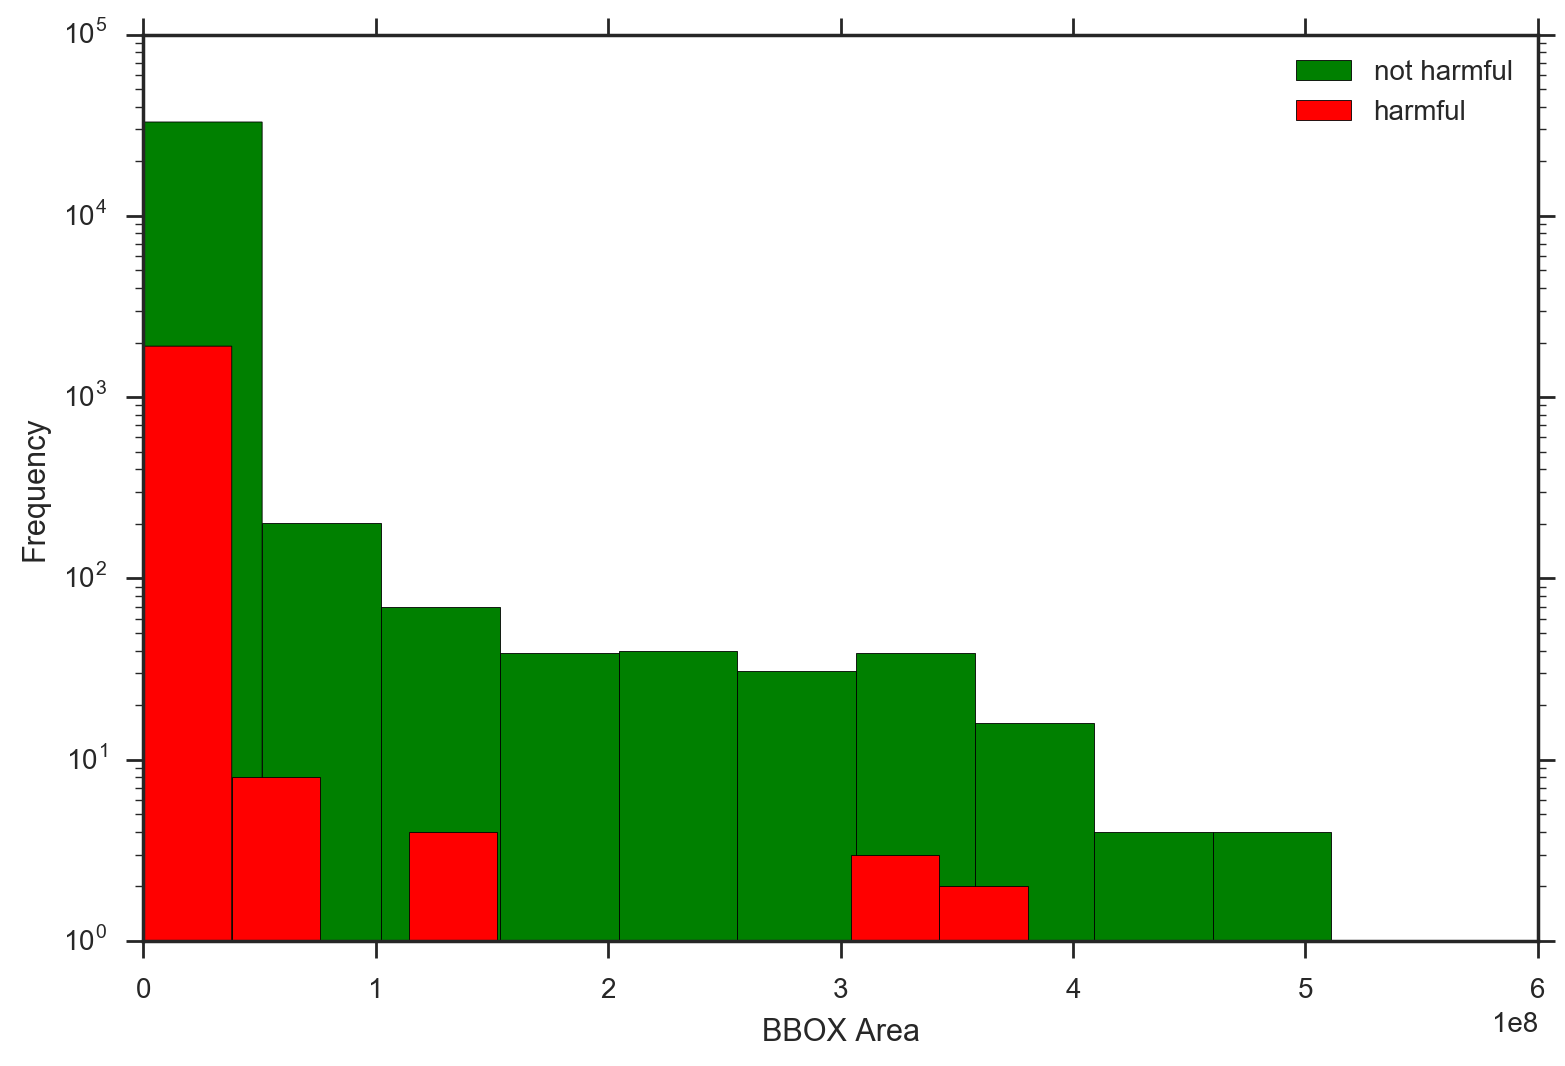

In [84]:
ax = numerical_features[numerical_features['harmful'] == False]['bbox_area'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['bbox_area'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('BBOX Area')
plt.tight_layout()

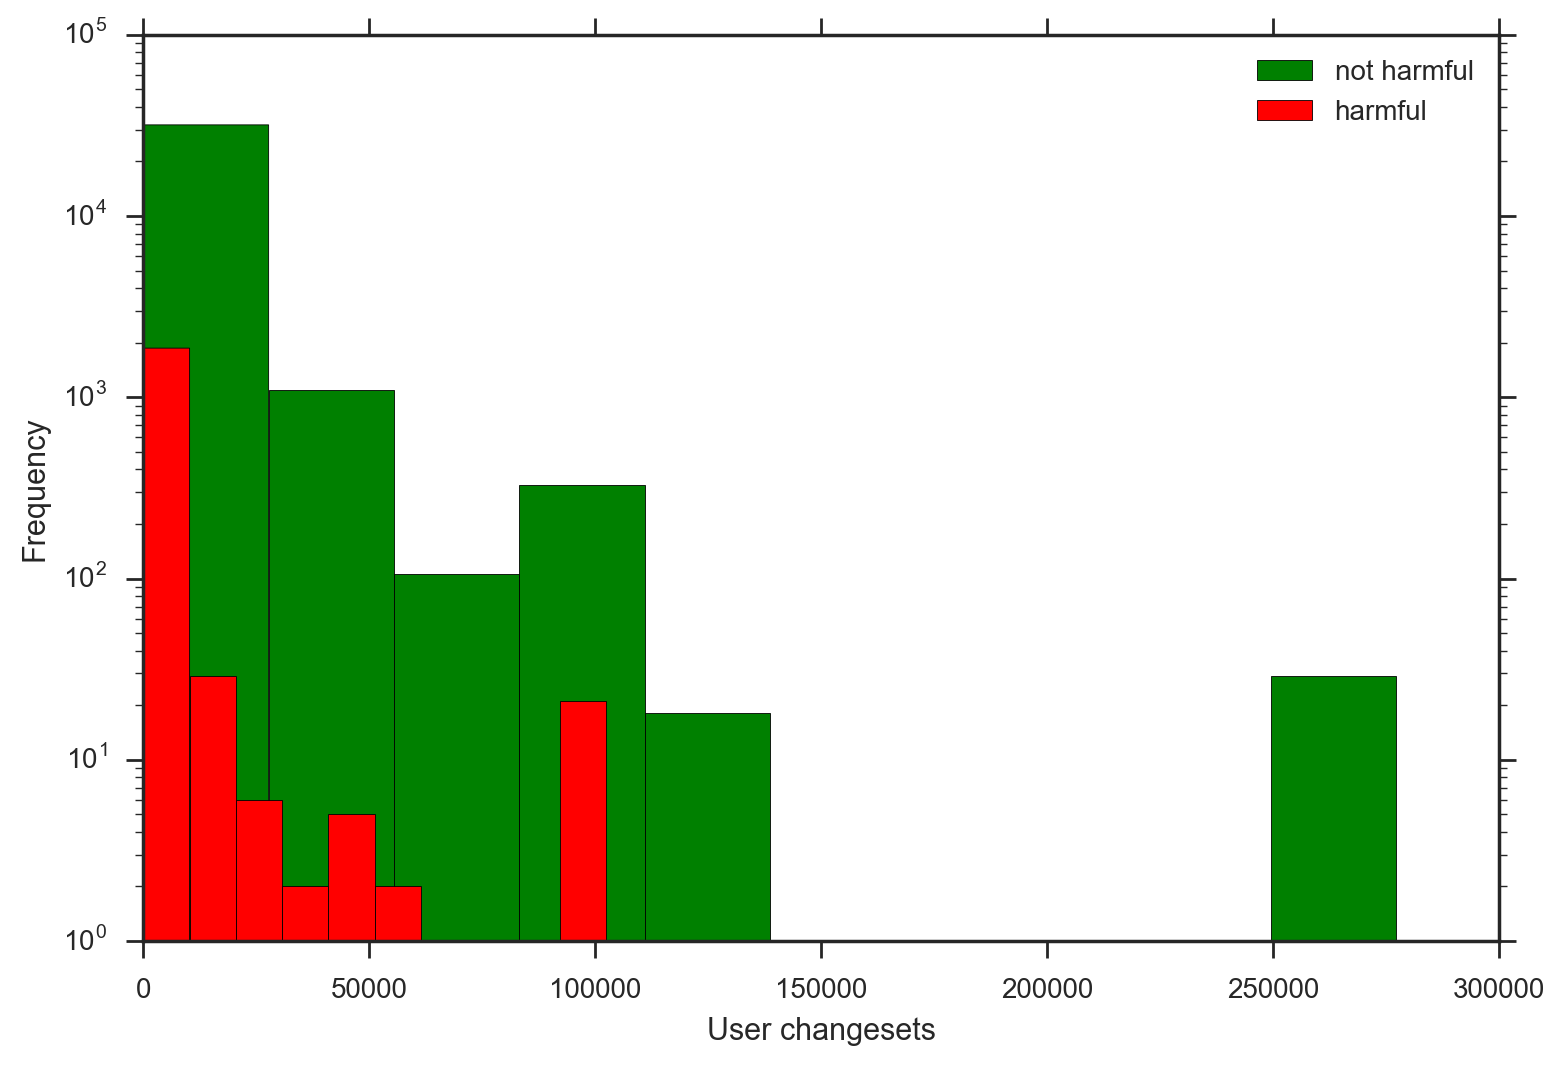

In [82]:
ax = numerical_features[numerical_features['harmful'] == False]['user_changesets'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['user_changesets'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('User changesets')
plt.tight_layout()

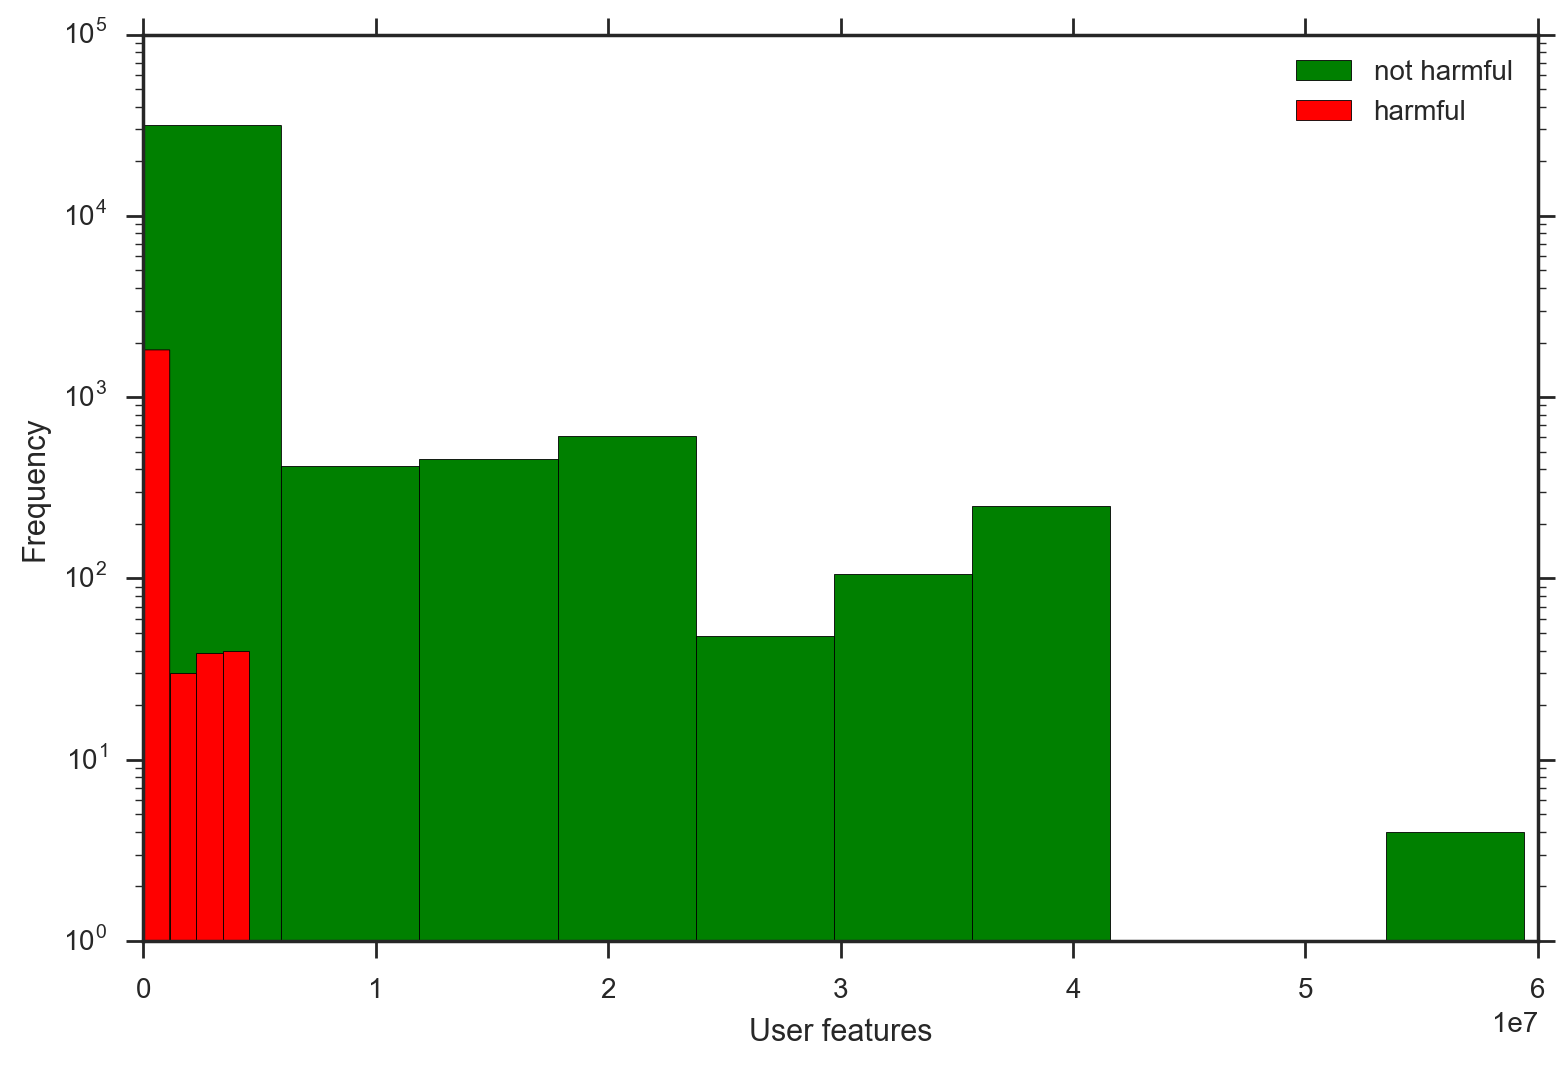

In [83]:
ax = numerical_features[numerical_features['harmful'] == False]['user_features'].plot.hist(color='g', label='not harmful')
numerical_features[numerical_features['harmful'] == True]['user_features'].plot.hist(color='r', label='harmful')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('User features')
plt.tight_layout()

In [135]:
# Calculating Cohen’s d statistic
import math

not_harmful = numerical_features[numerical_features['harmful'] == False].drop('harmful', axis=1)
harmful = numerical_features[numerical_features['harmful'] == True].drop('harmful', axis=1)

diff = not_harmful.mean() - harmful.mean()
var1 = not_harmful.var()
var2 = harmful.var()
n1, n2 = len(not_harmful), len(harmful)

pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
d = diff / np.array([math.sqrt(item) for item in pooled_var])
d

create             0.018109
modify             0.031587
delete             0.036452
bbox_area          0.018627
user_changesets    0.247757
user_features      0.308415
dtype: float64

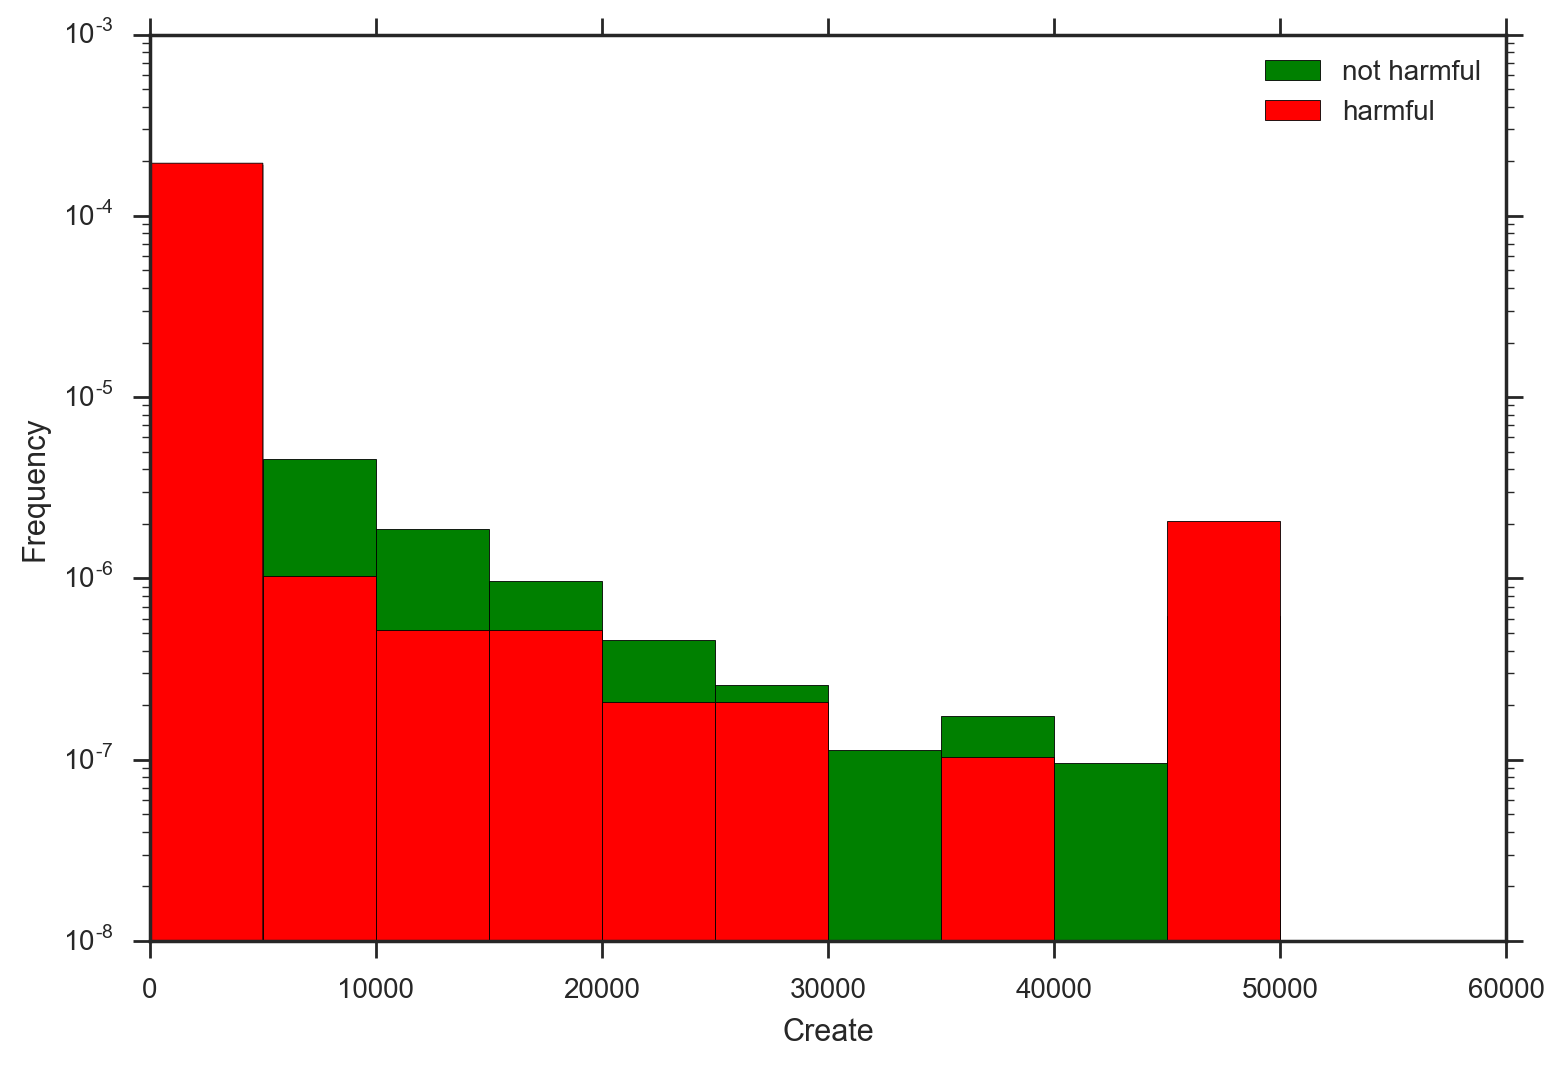

In [144]:
numerical_features[numerical_features['harmful'] == False]['create'].plot.hist(color='g', label='not harmful', normed=True)
ax = numerical_features[numerical_features['harmful'] == True]['create'].plot.hist(color='r', label='harmful', normed=True)
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('Create')
plt.tight_layout()

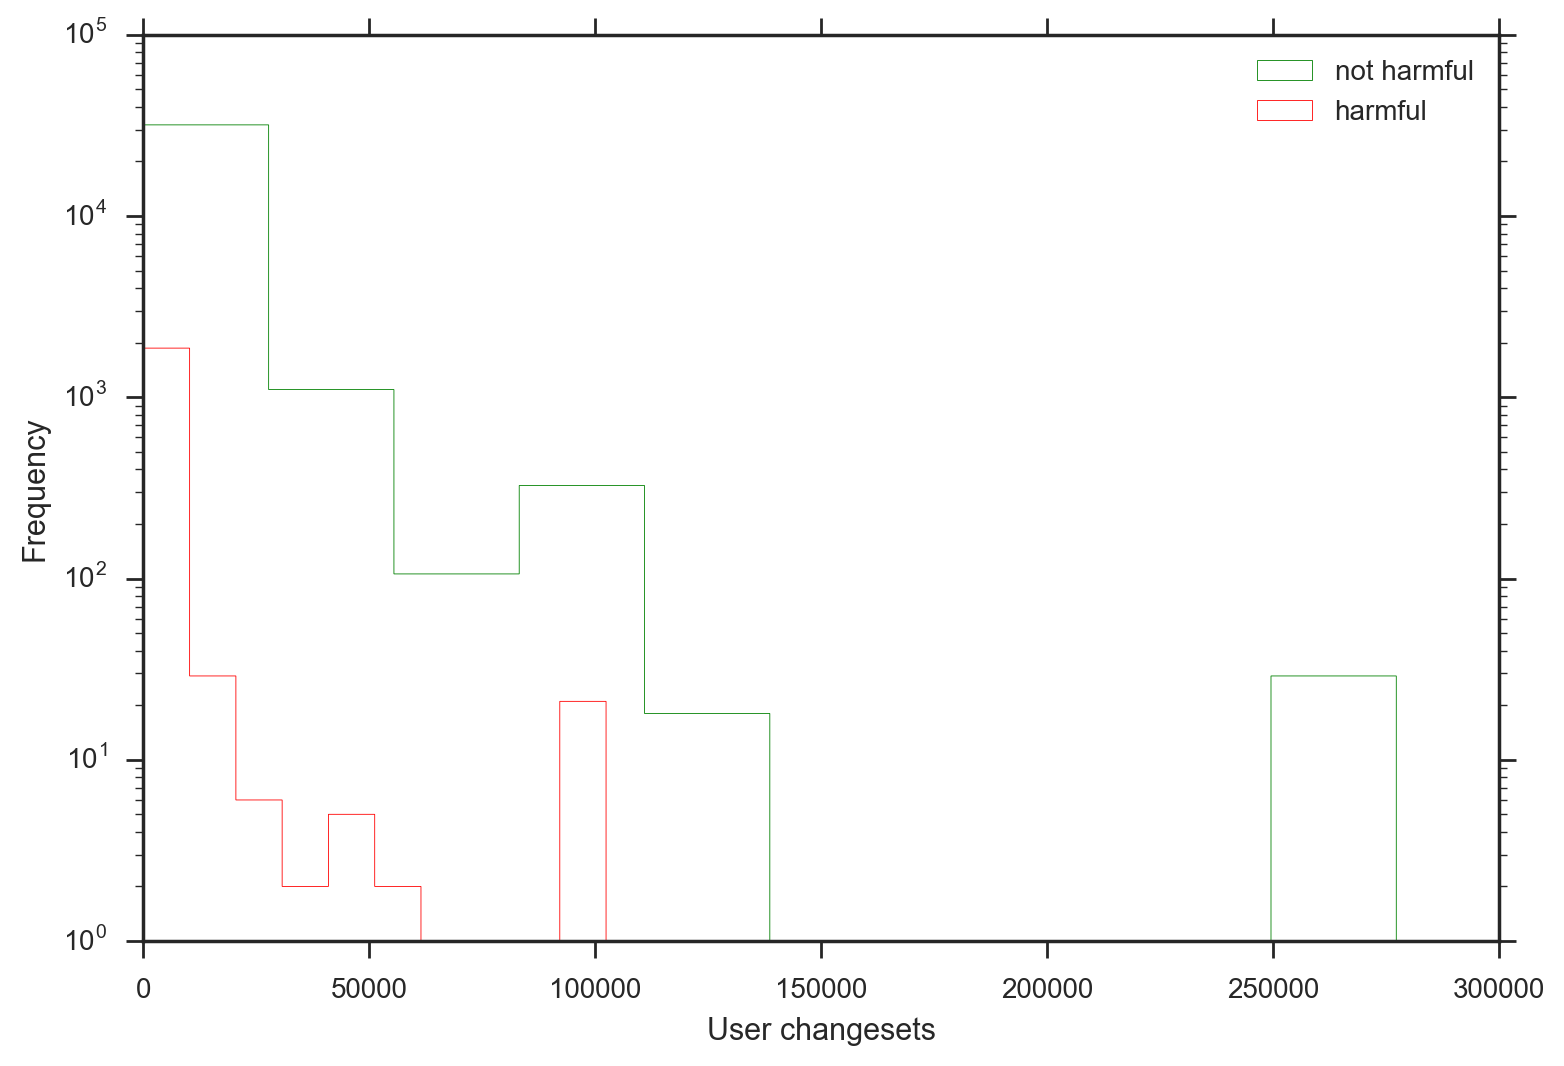

In [161]:
ax = numerical_features[numerical_features['harmful'] == False]['user_changesets'].plot.hist(color='g', label='not harmful', histtype='step')
numerical_features[numerical_features['harmful'] == True]['user_changesets'].plot.hist(color='r', label='harmful', histtype='step')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('User changesets')
plt.tight_layout()

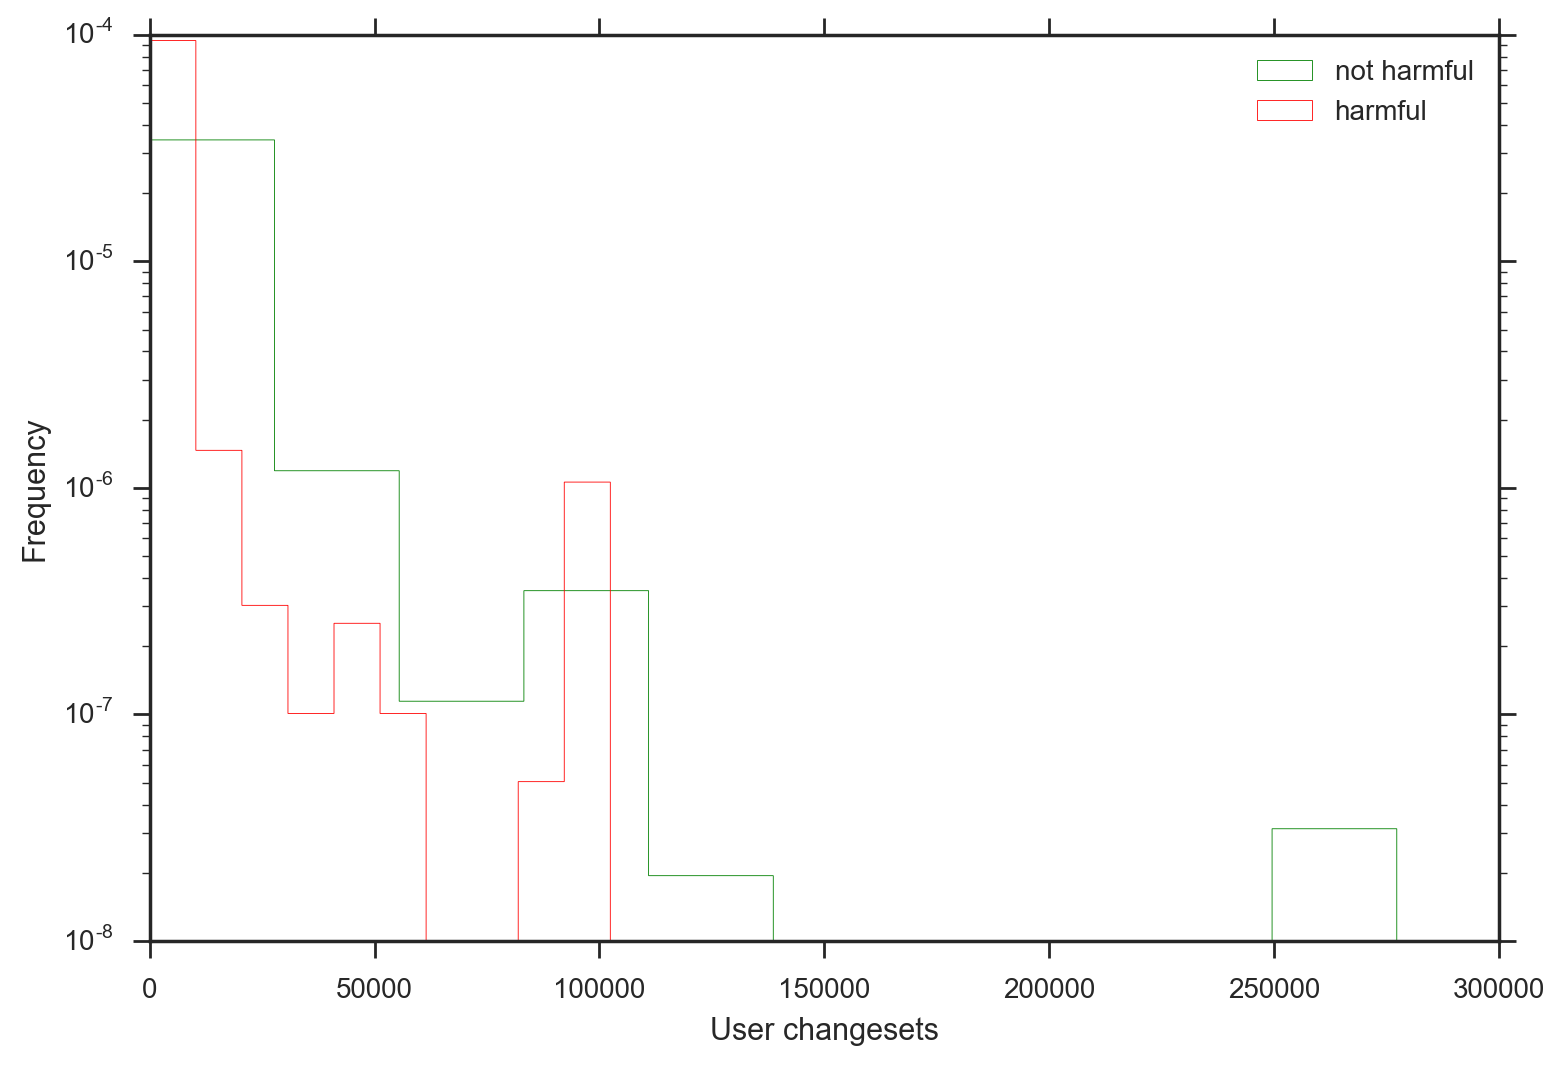

In [174]:
ax = numerical_features[numerical_features['harmful'] == False]['user_changesets'].plot.hist(color='g', label='not harmful', normed=True, histtype='step')
numerical_features[numerical_features['harmful'] == True]['user_changesets'].plot.hist(color='r', label='harmful', normed=True, histtype='step')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('User changesets')
plt.tight_layout()

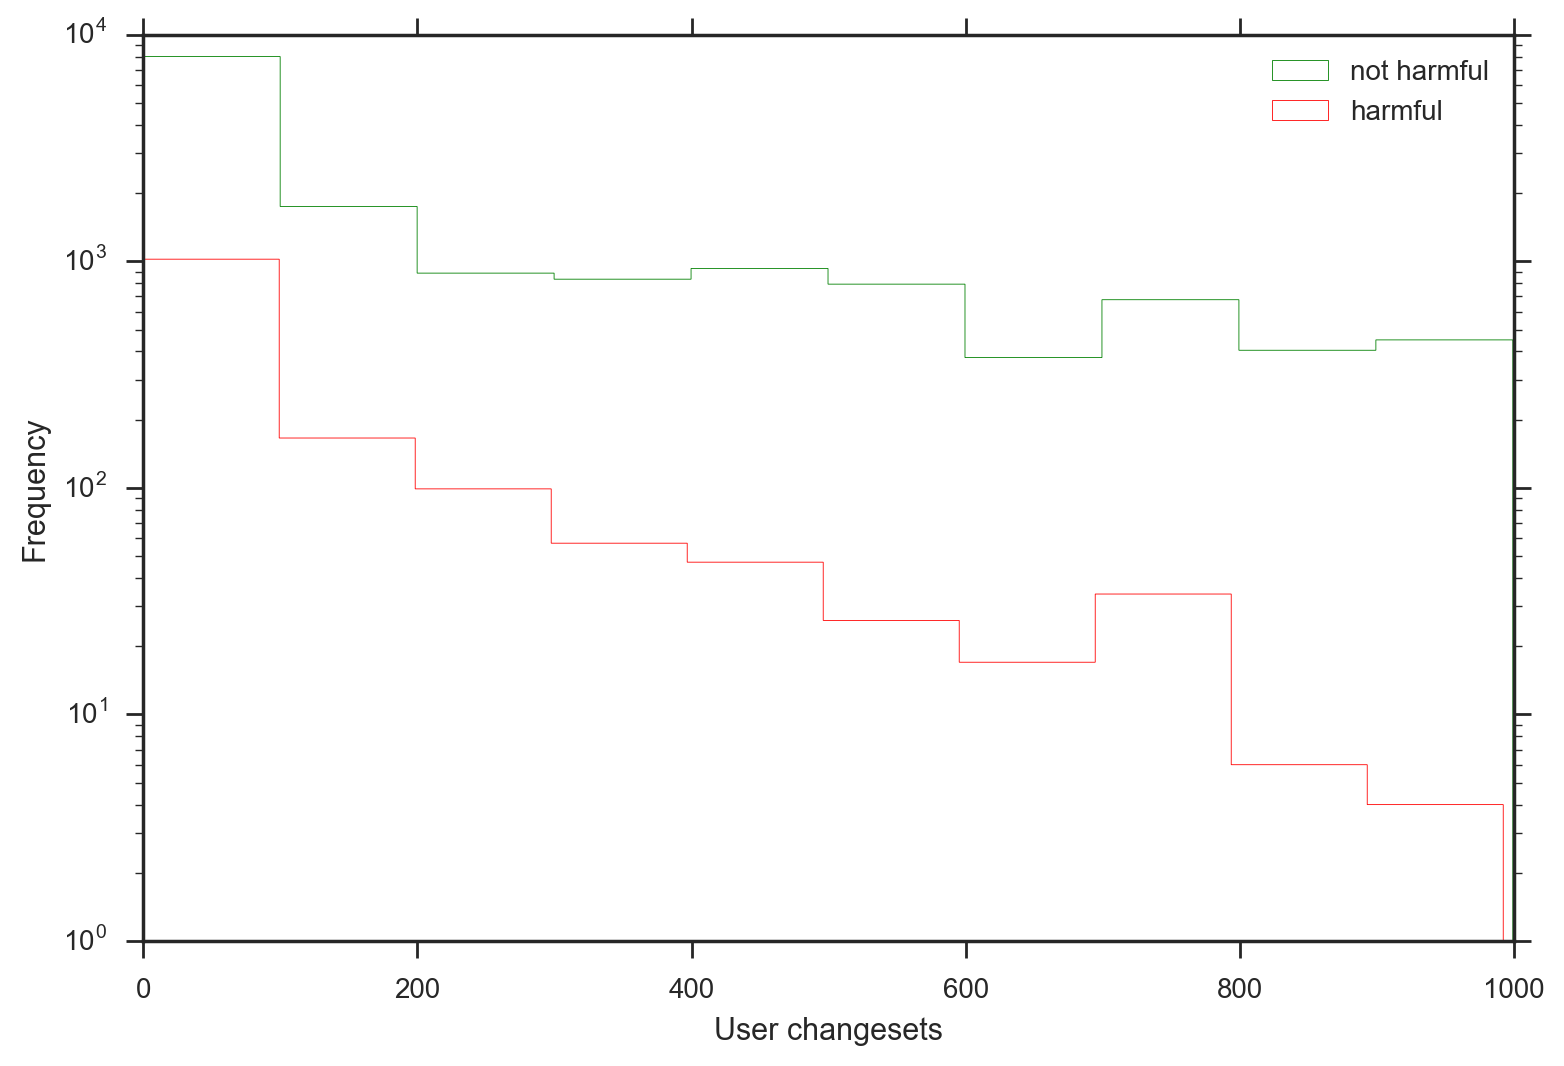

In [184]:
temp = numerical_features[numerical_features['user_changesets'] < 1000]
ax = temp[temp['harmful'] == False]['user_changesets'].plot.hist(color='g', label='not harmful', histtype='step')
temp[temp['harmful'] == True]['user_changesets'].plot.hist(color='r', label='harmful', histtype='step')
ax.set_yscale('log')
ax.legend(loc='upper right')
ax.set_xlabel('User changesets')
plt.tight_layout()

(10168,)
user            harmful
Will Pittenger  False      2436.0
damndog         False      2003.0
HSH Team        True       1308.0
Kevin Choi      False         7.0
Name: user_changesets, dtype: float64


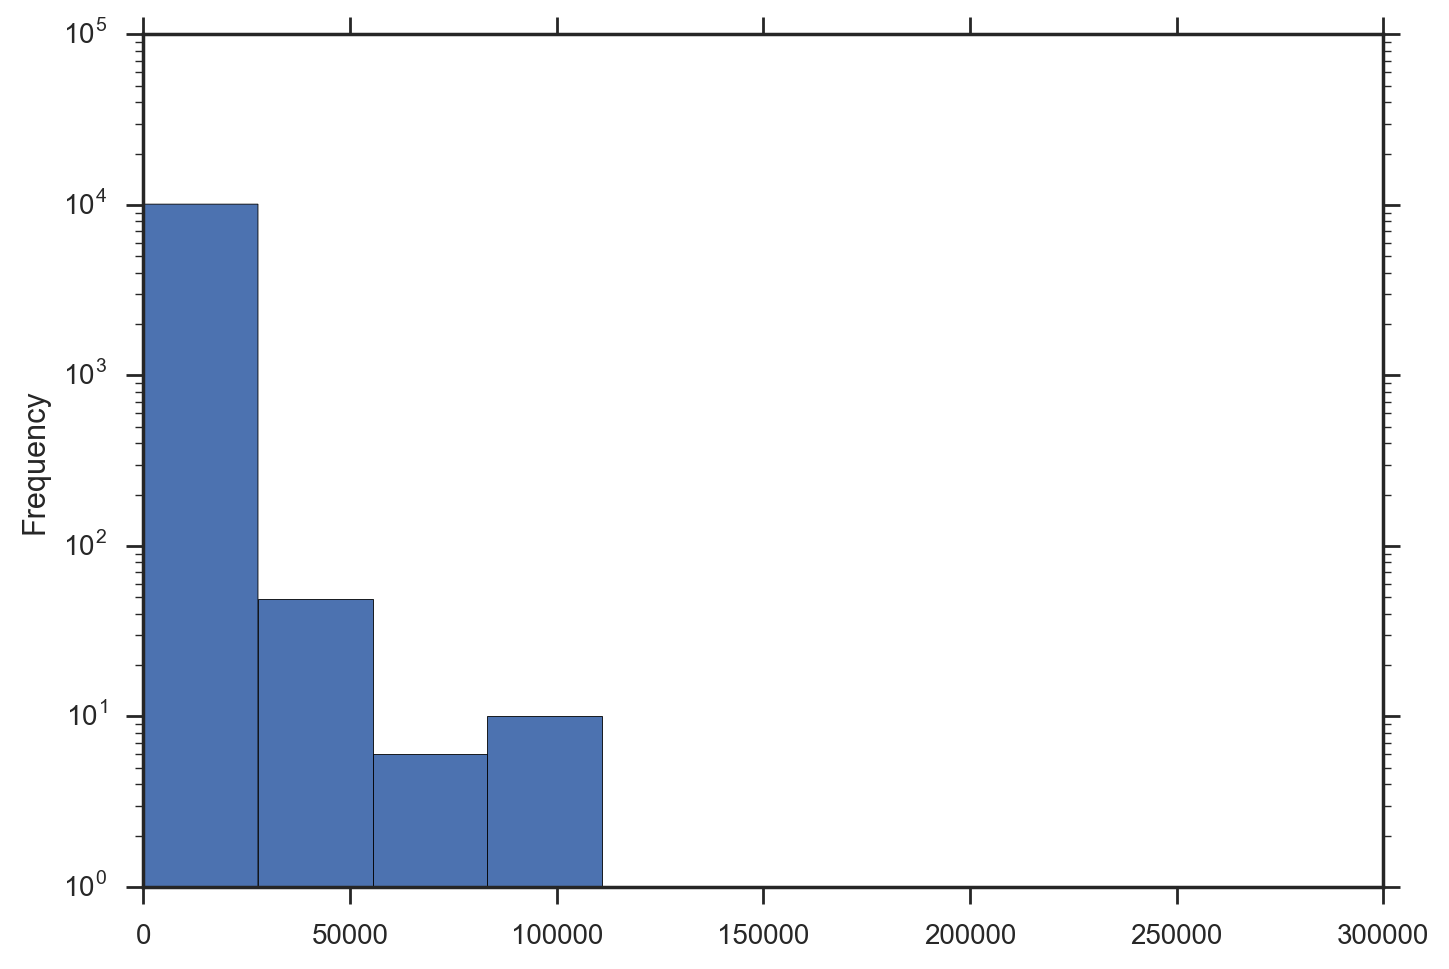

In [202]:
temp = features.groupby(['user', 'harmful'])['user_changesets'].max().fillna(0)
print(temp.shape)
print(temp.sample(4))
ax = temp.plot.hist()
ax.set_yscale('log')

In [237]:
temp = features.groupby(['user', 'harmful'])['ID'].count().unstack().fillna(0)
print(temp[temp[True] == 0].shape)
print(temp[temp[True] != 0].shape)

(8938, 2)
(862, 2)


In [256]:
temp['total'] = temp[False] + temp[True]
temp['percentage_harmful'] = 100.0 * temp[True] / temp['total']
temp = temp.sort('percentage_harmful', ascending=False)
temp[temp['total'] > 10].head(2)

harmful,False,True,total,percentage_harmful
user,,,,
Jigair37,0.0,17.0,17.0,100.0
PeterSandor,0.0,24.0,24.0,100.0


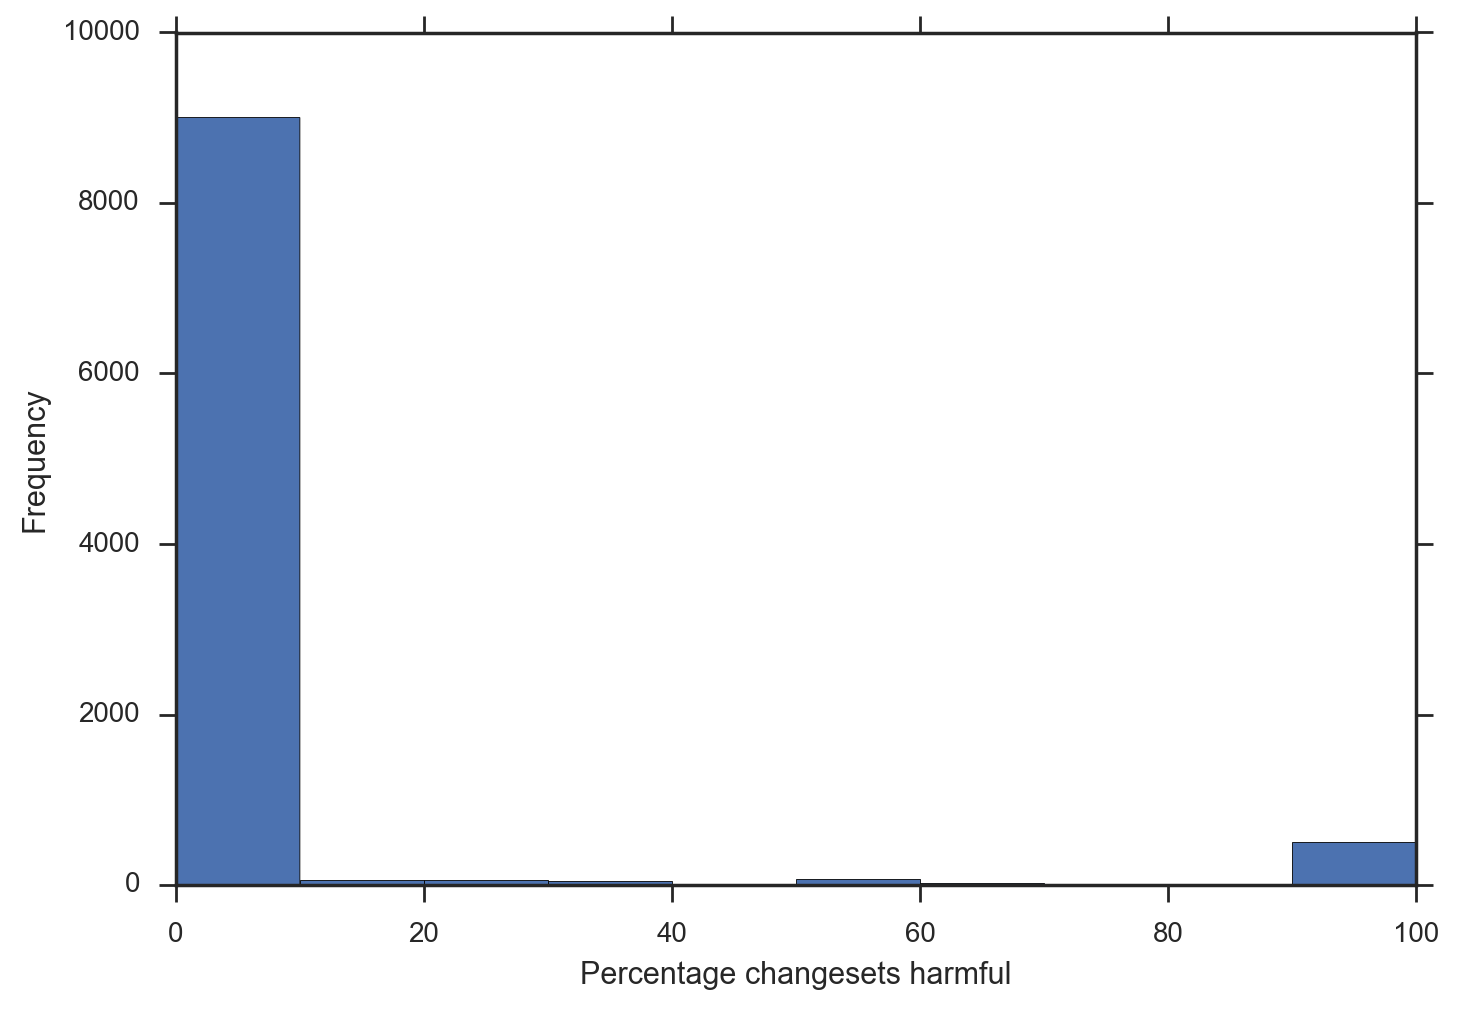

In [260]:
ax = temp['percentage_harmful'].plot.hist()
ax.set_xlabel('Percentage changesets harmful')

In [266]:
round(94, -1)

90

In [268]:
temp['percentage_harmful'].apply(lambda x: round(x, -1)).value_counts()

0.0      8968
100.0     498
50.0       75
10.0       72
20.0       72
30.0       45
70.0       24
40.0       22
80.0       12
90.0        8
60.0        4
Name: percentage_harmful, dtype: int64

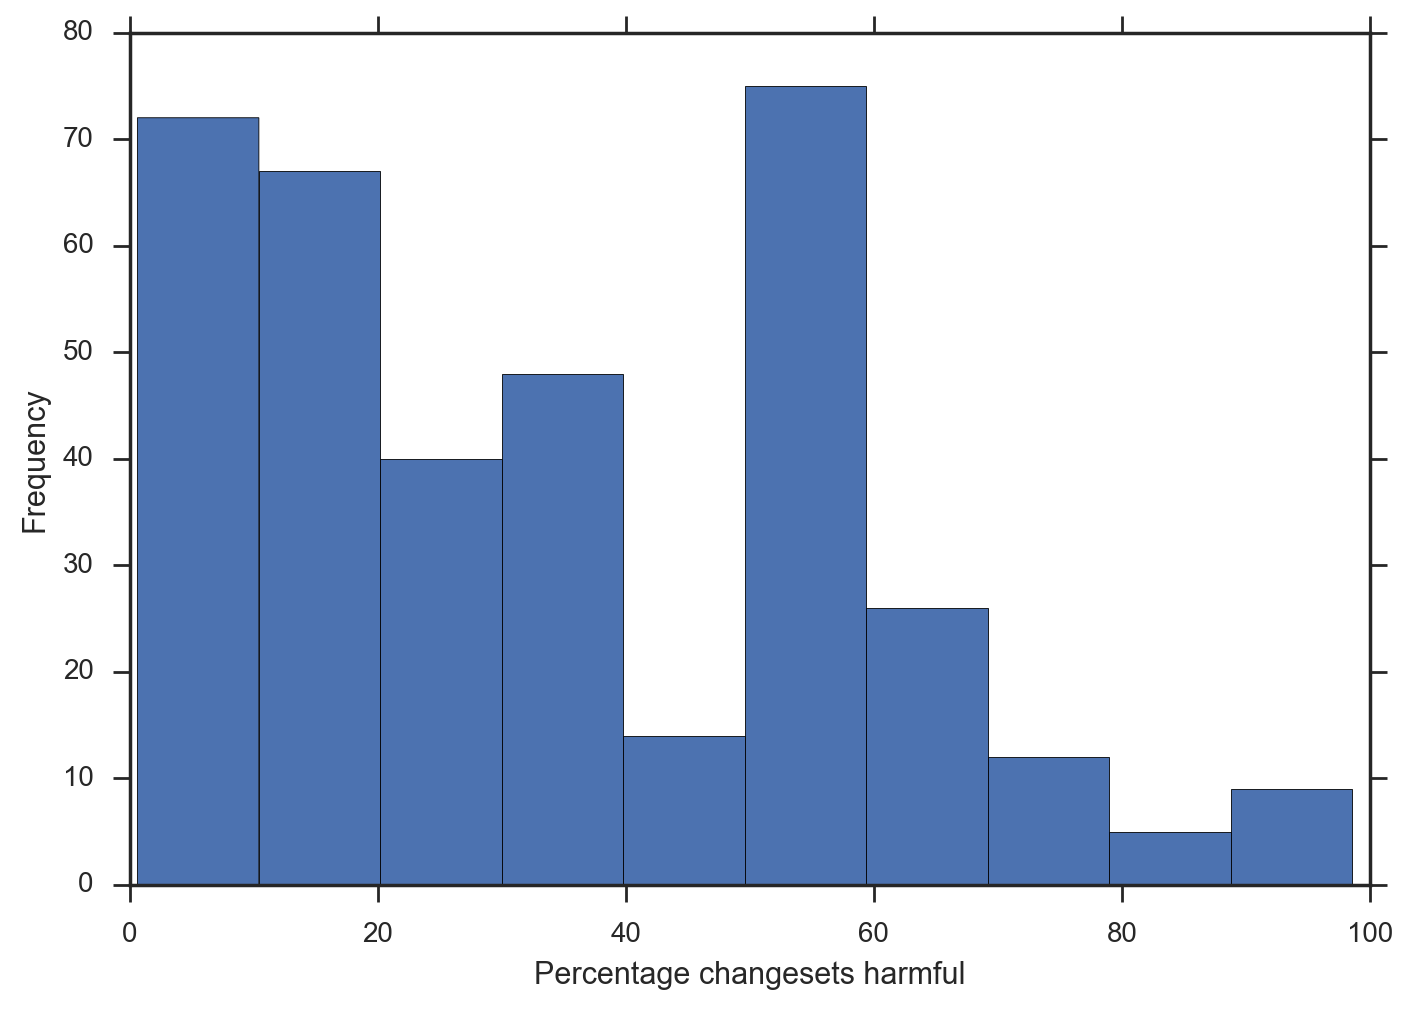

In [272]:
ax = temp[(temp['percentage_harmful'] != 0) & (temp['percentage_harmful'] != 100)]['percentage_harmful'].plot.hist()
ax.set_xlabel('Percentage changesets harmful')

In [311]:
users = features['user'].unique()
users_with_harmful = features[features['harmful'] == True]['user'].unique()
users_without_harmful = np.array(list(set(users) - set(users_with_harmful)))

In [312]:
print('Users: {}'.format(users.shape))
print('Users with one or more harmful changeset: {}'.format(users_with_harmful.shape))
print('Users with no harmful changeset: {}'.format(users_without_harmful.shape))

Users: (9801,)
Users with one or more harmful changeset: (863,)
Users with no harmful changeset: (8938,)


In [325]:
print(features.shape)

features_by_users_with_harmful = features[features['user'].apply(lambda x: x in users_with_harmful) == True]
print(features_by_users_with_harmful.shape)

features_by_users_without_harmful = features[features['user'].apply(lambda x: x in users_without_harmful) == True]
print(features_by_users_without_harmful.shape)

(36097, 9)
(5700, 9)
(30237, 9)


In [329]:
# There are 160 features with user as NaN
features['user'].isnull().value_counts()

False    35937
True       160
Name: user, dtype: int64

In [335]:
features_by_users_with_harmful.describe()

,ID,create,modify,delete,bbox_area,user_changesets,user_features
count,5.700000e+03,5700.000000,5700.000000,5700.000000,5.700000e+03,5637.000000,5.637000e+03
mean,4.217707e+07,710.640702,175.564561,446.902456,2.657226e+06,8934.171368,8.796490e+05
std,2.973847e+06,4006.882800,1300.680433,2431.574054,2.518712e+07,19720.877580,1.434352e+06
min,1.958636e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3.967254e+07,0.000000,0.000000,0.000000,6.280000e-02,94.000000,4.578000e+03
50%,4.339266e+07,2.000000,1.000000,0.000000,1.708450e+00,1621.000000,1.601190e+05
75%,4.453865e+07,61.000000,23.250000,37.000000,7.905010e+01,7582.000000,1.092202e+06
max,4.613458e+07,50001.000000,49998.000000,49846.000000,4.923276e+08,102423.000000,1.136299e+07


In [336]:
features_by_users_without_harmful.describe()

,ID,create,modify,delete,bbox_area,user_changesets,user_features
count,3.023700e+04,30237.000000,30237.00000,30237.000000,3.023700e+04,29710.000000,2.971000e+04
mean,4.191672e+07,918.370473,164.59070,394.080001,2.316270e+06,5283.584483,1.811022e+06
std,2.929124e+06,4086.083962,1249.85968,2548.572091,2.140054e+07,13953.485906,5.237054e+06
min,9.201246e+06,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3.886198e+07,0.000000,0.00000,0.000000,4.810000e-02,93.000000,5.119000e+03
50%,4.288727e+07,4.000000,1.00000,0.000000,1.088600e+00,1226.500000,1.794380e+05
75%,4.443025e+07,229.000000,18.00000,21.000000,4.590060e+01,4770.000000,1.069196e+06
max,4.615000e+07,50001.000000,50000.00000,50001.000000,5.112079e+08,277340.000000,5.940455e+07


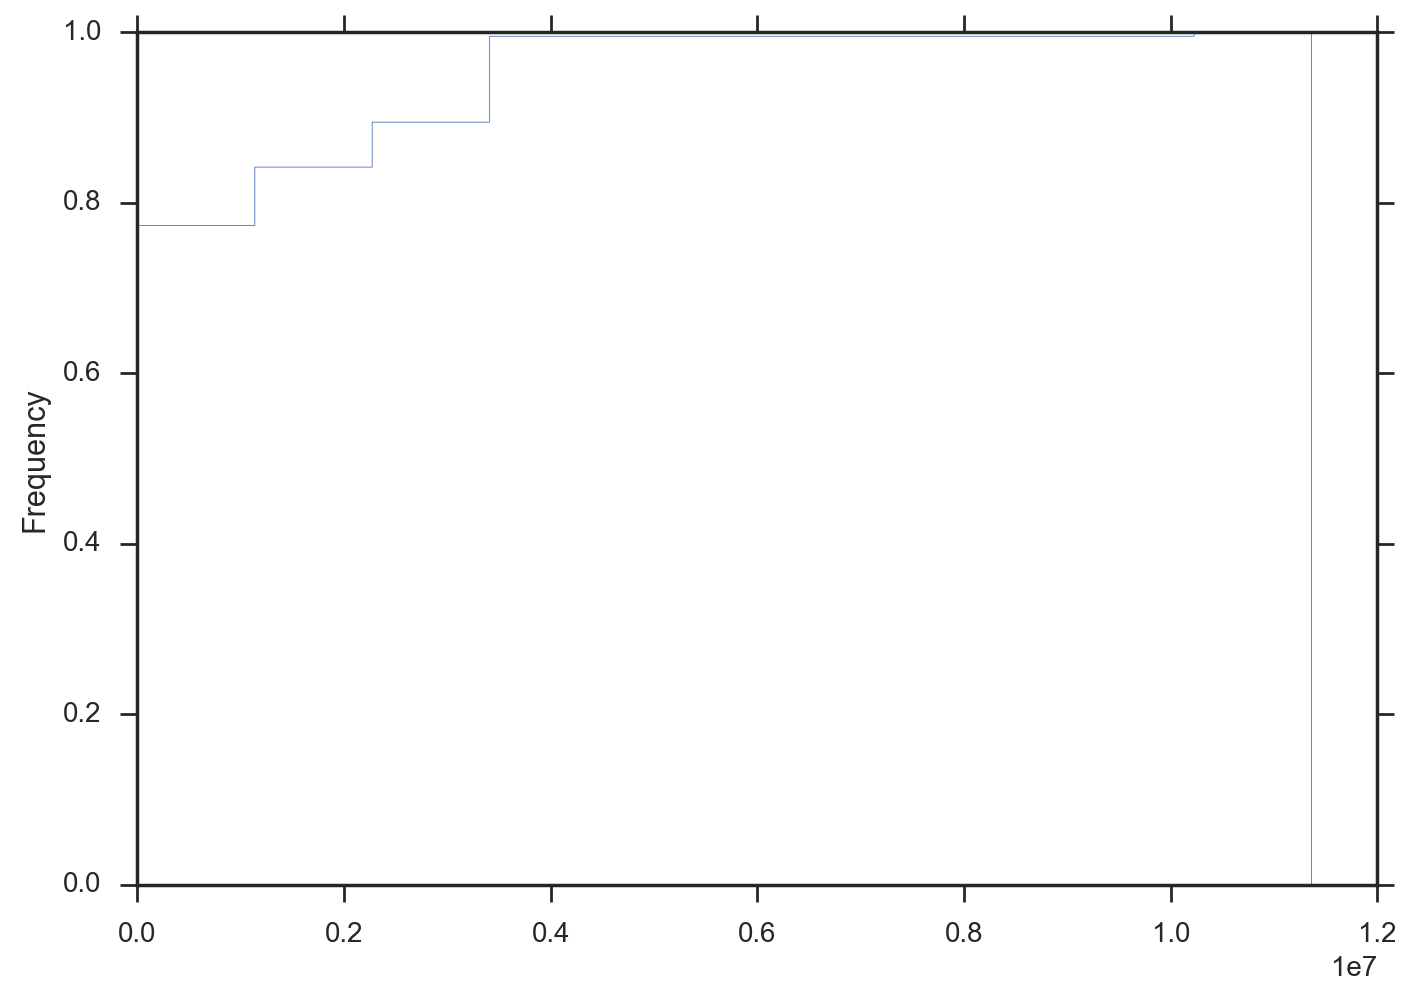

In [344]:
features_by_users_with_harmful['user_features'].plot.hist(cumulative=True, histtype='step', normed=True)

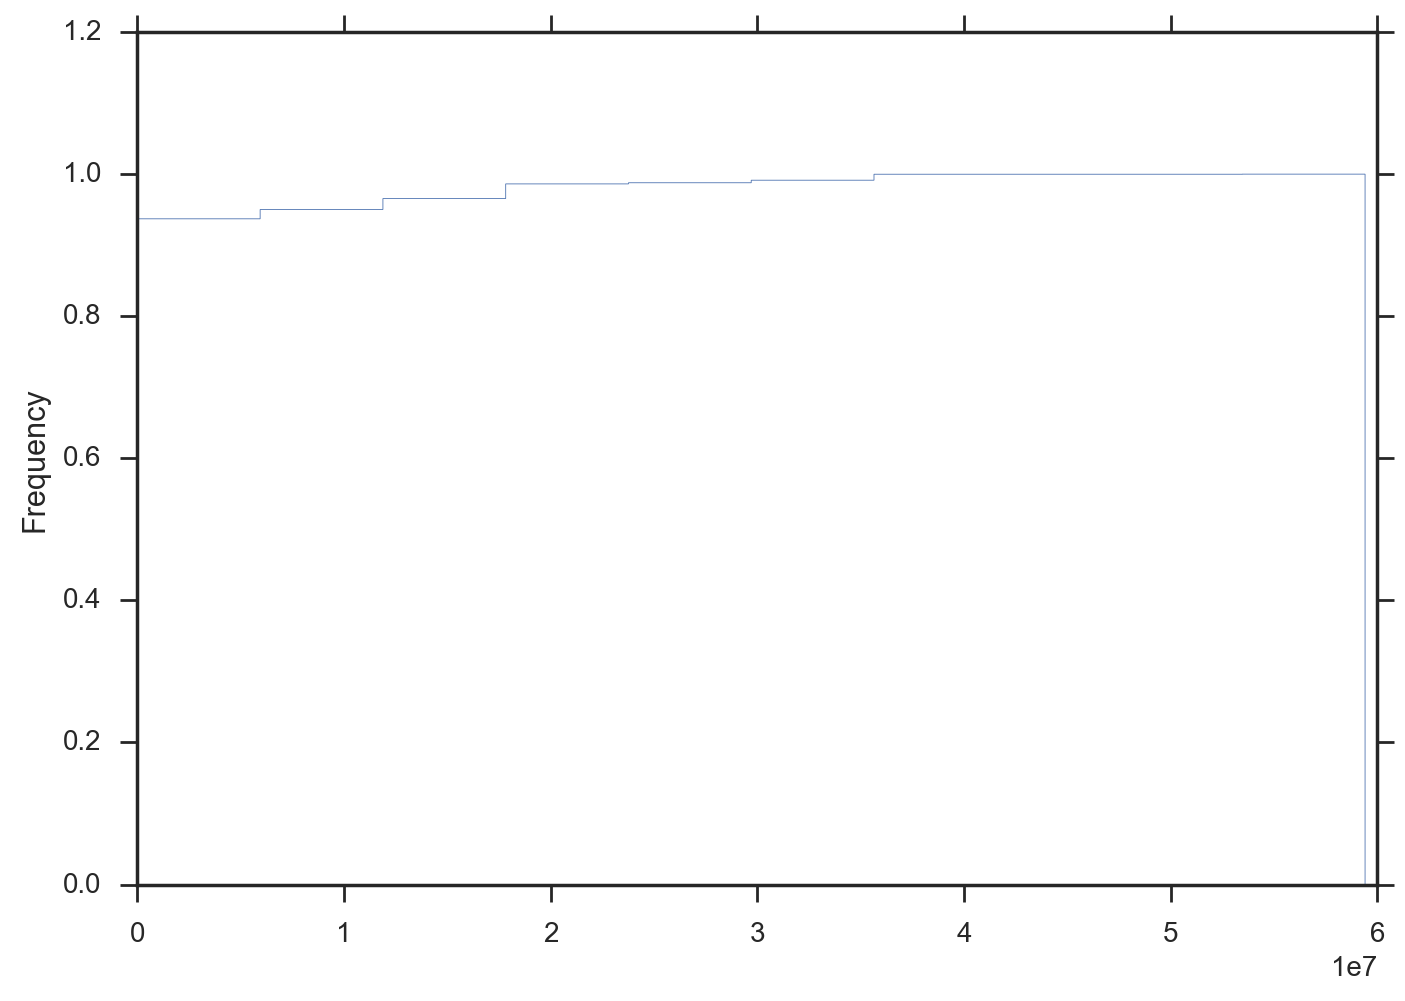

In [345]:
features_by_users_without_harmful['user_features'].plot.hist(cumulative=True, histtype='step', normed=True)

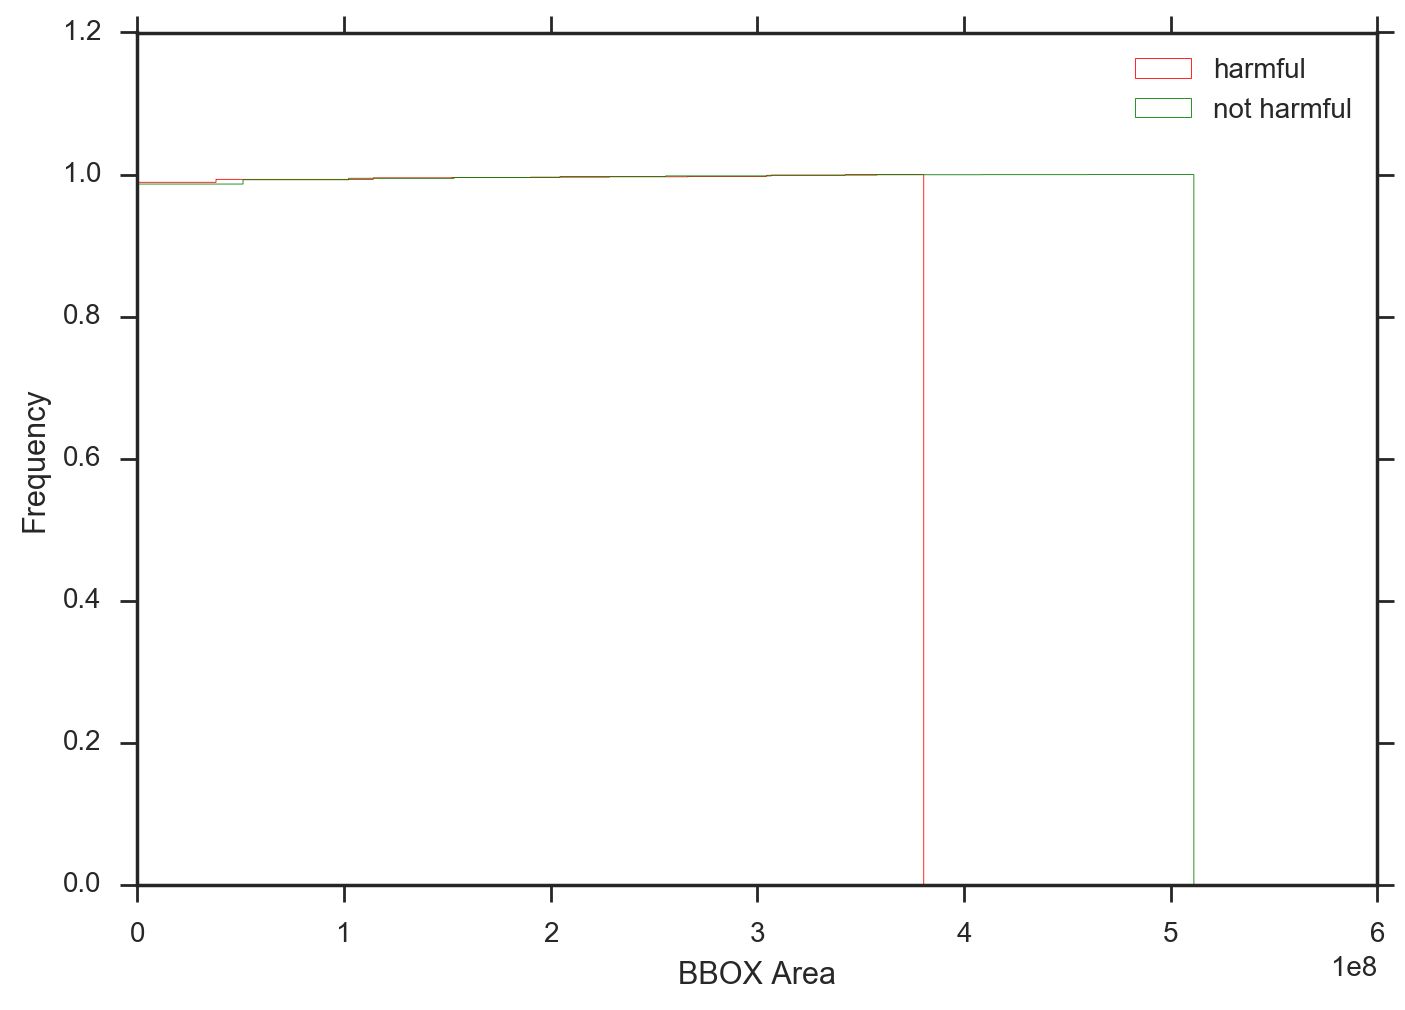

In [359]:
numerical_features[numerical_features['harmful'] == True]['bbox_area'].plot.hist(cumulative=True, histtype='step', normed=True, label='harmful', color='r')
ax = numerical_features[numerical_features['harmful'] == False]['bbox_area'].plot.hist(cumulative=True, histtype='step', normed=True, label='not harmful', color='g')
ax.legend(loc='upper right')
ax.set_xlabel('BBOX Area')

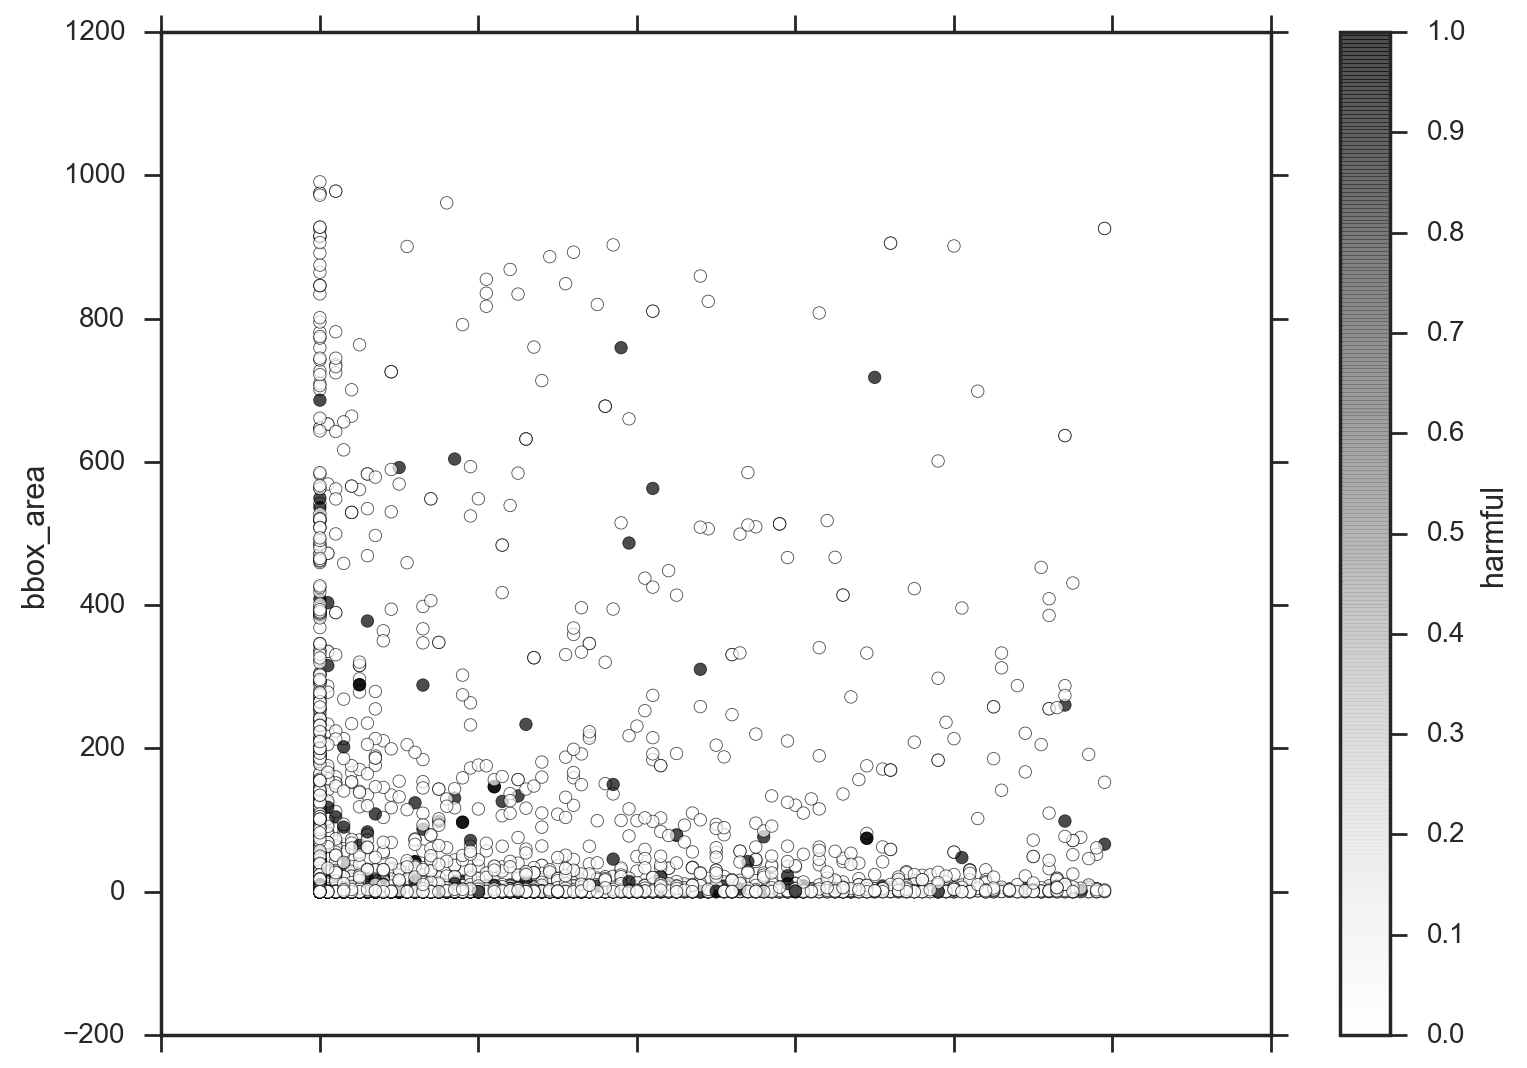

In [388]:
numerical_features[(numerical_features['create'] < 100) & (numerical_features['bbox_area'] < 1000)].iloc[:10000].plot.scatter(x='create', y='bbox_area', c='harmful', alpha=0.7)
plt.tight_layout()